In [114]:
import pandas as pd
import numpy as np
from skimpy import clean_columns
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns

from scipy.stats import norm
import scipy.stats as stats
from scipy.stats import chi2

plt.rcParams['font.sans-serif'] = ['Avenir']


# Read Data

In [2]:
# Read literature review data.

lit_review_data = pd.read_csv("lit_review_data.csv")
lit_review_data = clean_columns(lit_review_data)
lit_review_data


22 column names have been cleaned

,title,author,year,country,continent,climate,comparison,response,response_type,response_category,...,local_effect,landscape,landscape_gradient,minimum_complexity,maximum_complexity,landscape_effect,interaction_details,interaction_effect_simple,interaction_effect,description
0,A macro-scale perspective on within-farm manag...,Amano et al.,2011,Japan,Asia,NaN,Conventional,Spider abundance,Biodiversity,Natural enemy,...,Negative,The proportion of forest area surrounding the ...,"<20% forest, >20% forest",NaN,NaN,Positive,NS,NS,NS,A multilevel modelling approach revealed that ...
1,A multitaxa assessment of the effectiveness of...,Boetzel et al.,2021,Germany,Europe,NaN,Conventional,Cicada species richness,Biodiversity,Arthropod,...,NS,The amount of seminatural habitat (forest edge...,3.6-25% semi-natural habitat,3.6,25.0,NS,NS,NS,NS,All other taxonomic groups showed no significa...
2,A multitaxa assessment of the effectiveness of...,Boetzel et al.,2021,Germany,Europe,NaN,Conventional,Orthopteran species richness,Biodiversity,Arthropod,...,NS,The amount of seminatural habitat (forest edge...,3.6-25% semi-natural habitat,3.6,25.0,NS,NS,NS,NS,All other taxonomic groups showed no significa...
3,A multitaxa assessment of the effectiveness of...,Boetzel et al.,2021,Germany,Europe,NaN,Conventional,Bee species richness,Biodiversity,Pollinator,...,NS,The amount of seminatural habitat (forest edge...,3.6-25% semi-natural habitat,3.6,25.0,Positive,NS,NS,NS,An increasing proportion of seminatural habita...
4,A multitaxa assessment of the effectiveness of...,Boetzel et al.,2021,Germany,Europe,NaN,Conventional,Butterfly species richness,Biodiversity,Pollinator,...,NS,The amount of seminatural habitat (forest edge...,3.6-25% semi-natural habitat,3.6,25.0,NS,NS,NS,NS,All other taxonomic groups showed no significa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,Wild bee pollinators provide the majority of c...,Winfree et al.,2007,United States,North America,NaN,Conventional,Abundance (wood-nesting bees),Biodiversity,Pollinator,...,NS,We analysed landscape cover as the proportion ...,3-64% woodland,3.0,64.0,NS,NS,NS,NS,The abundance of wood-nesting bees was associa...
577,Wild bee pollinators provide the majority of c...,Winfree et al.,2007,United States,North America,NaN,Conventional,Wild bee visitation,Ecosystem Services,Pollinator,...,NS,We analysed landscape cover as the proportion ...,3-64% woodland,3.0,64.0,NS,NS,NS,NS,"Similarly, no individual variables were strong..."
578,Wild bee pollinators provide the majority of c...,Winfree et al.,2007,United States,North America,NaN,Conventional,Abundance (eusocial bees),Biodiversity,Pollinator,...,NS,We analysed landscape cover as the proportion ...,3-64% woodland,3.0,64.0,NS,NS,NS,NS,"Similarly, no individual variables were strong..."
579,Wild bee pollinators provide the majority of c...,Winfree et al.,2007,United States,North America,NaN,Conventional,Abundance (solitary bees),Biodiversity,Pollinator,...,Positive,We analysed landscape cover as the proportion ...,3-64% woodland,3.0,64.0,NS,NS,NS,NS,The abundance of solitary bees showed little a...


In [3]:
len(lit_review_data["title"])


581

In [4]:
# Convert column data types.

lit_review_data[
    [
        "title",
        "author",
        "country",
        "continent",
        "comparison",
        "response",
        "response_category",
        "local_factor",
        "local_strategy",
        "local_effect",
        "landscape",
        "landscape_effect",
        "interaction_effect",
        "response_type",
    ]
] = lit_review_data.loc[
    :,
    [
        "title",
        "author",
        "country",
        "continent",
        "comparison",
        "response",
        "response_category",
        "local_factor",
        "local_strategy",
        "local_effect",
        "landscape",
        "landscape_effect",
        "interaction_effect",
        "response_type",
    ],
].astype(
    "category"
)


# Geographical Distribution

<AxesSubplot: title={'center': 'Continent Count'}>

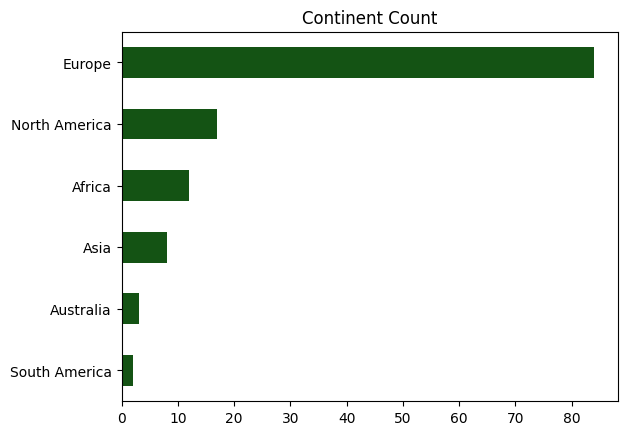

In [6]:
# By continent.

lit_review_data.drop_duplicates(subset="title").continent.value_counts(
    ascending=True
).plot(kind="barh", title="Continent Count", color="#145314")


In [5]:
lit_review_data.drop_duplicates(subset="title").continent.value_counts(ascending=True)


South America     2
Australia         3
Asia              8
Africa           12
North America    17
Europe           84
Name: continent, dtype: int64

<AxesSubplot: title={'center': 'Country Count by Continent'}, xlabel='continent'>

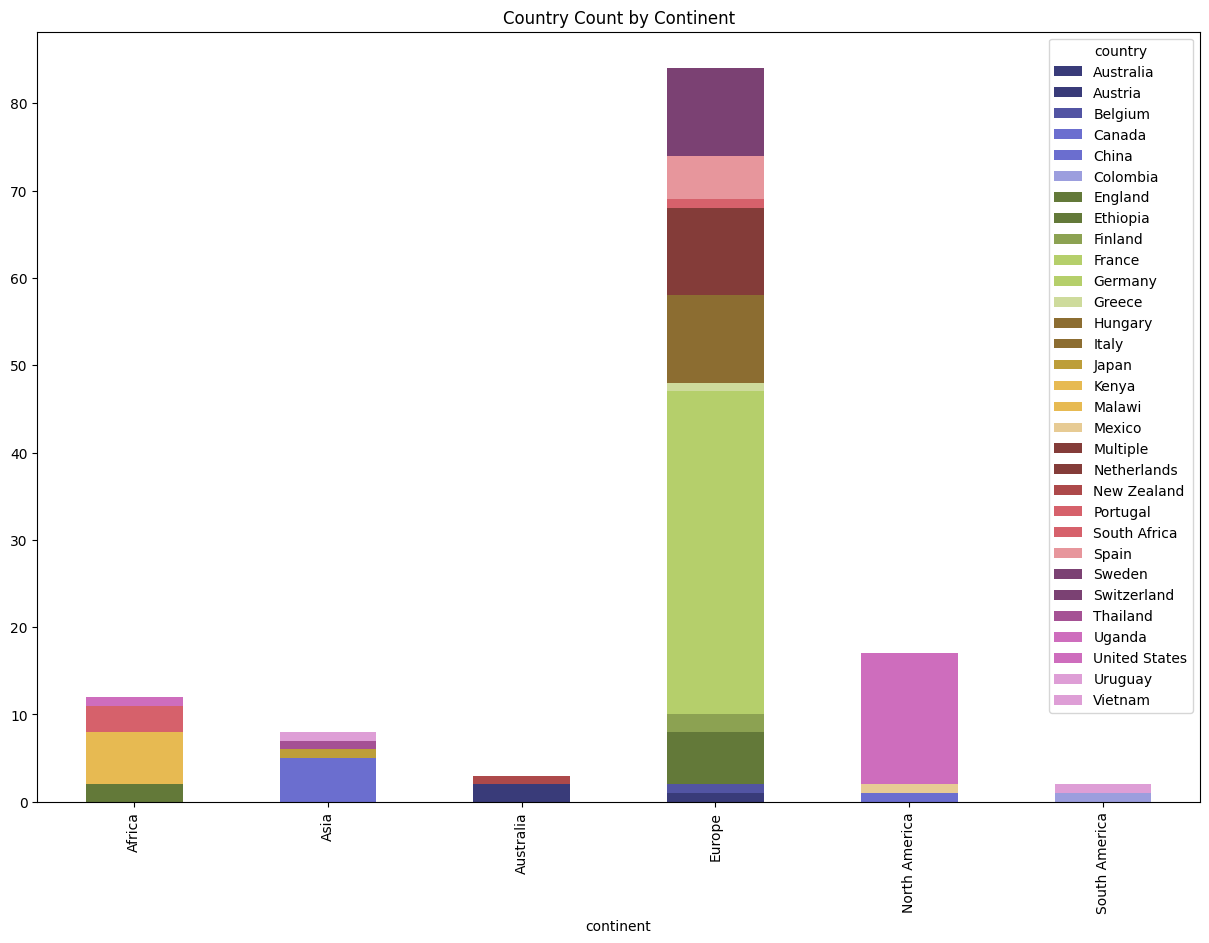

In [6]:
# By continent, separated by country.

lit_review_data.drop_duplicates(subset="title").groupby(
    ["continent", "country"]
).size().unstack().plot(
    kind="bar",
    stacked=True,
    cmap="tab20b",
    title="Country Count by Continent",
    figsize=(15, 10),
)


In [7]:
lit_review_data.local_strategy.value_counts(ascending=True)


Structure     58
Diversity     73
Floral       139
Intensity    311
Name: local_strategy, dtype: int64

In [8]:
lit_review_data.response_category.value_counts(ascending=True)


Arthropod         32
Crop              69
Pest              74
Pollinator       120
Natural enemy    286
Name: response_category, dtype: int64

In [9]:
lit_review_data.response_type.value_counts(ascending=True)


Ecosystem Services    227
Biodiversity          354
Name: response_type, dtype: int64

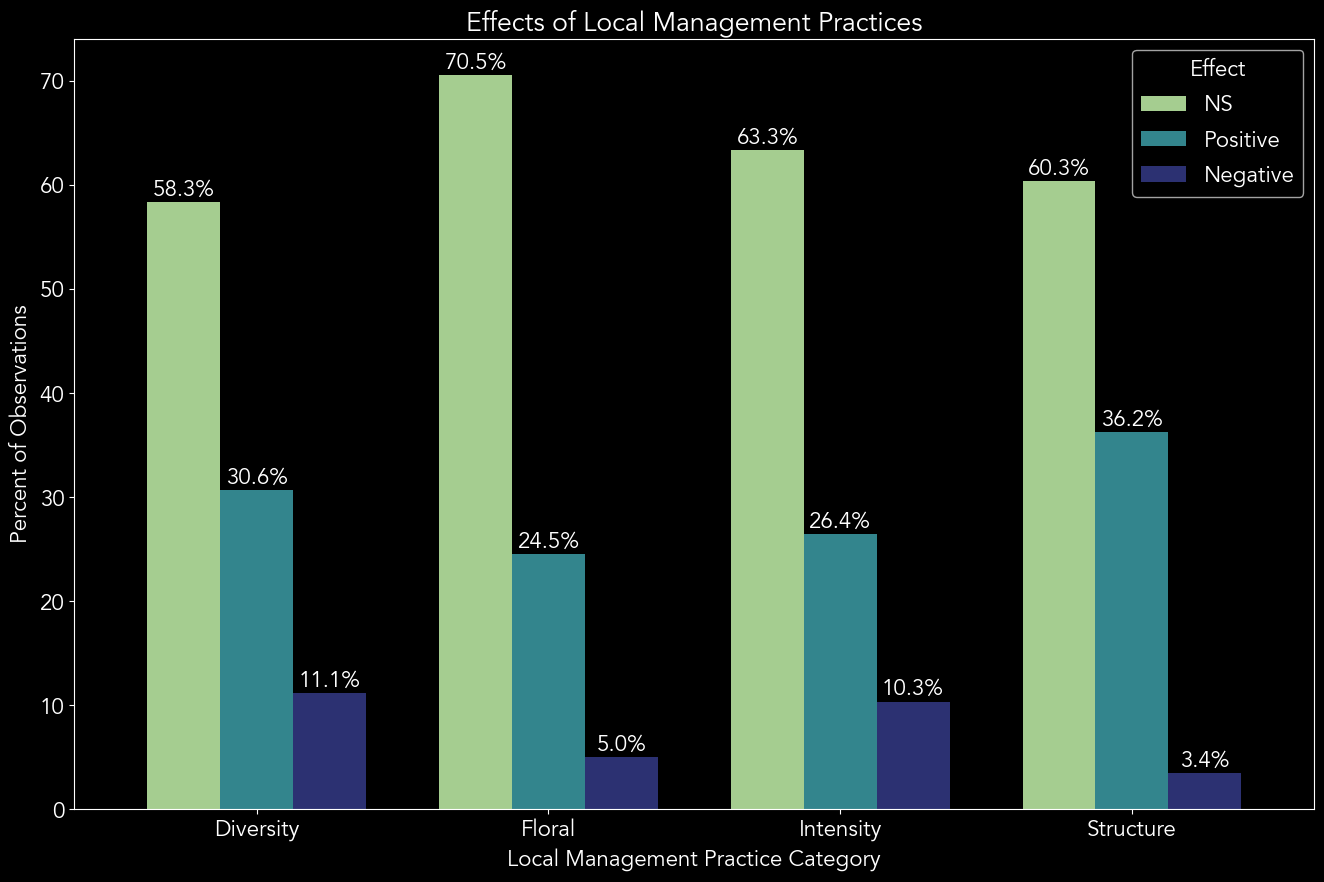

In [135]:
# Plotting local effects of local practices.

plt.style.use('dark_background')
plt.rcParams.update({'font.size': 16})

ax1 = (
    lit_review_data.groupby(["local_strategy"])[["local_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()[["NS", "Positive", "Negative"]]
    .plot(
        kind="bar",
        width=0.75,
        colormap="crest",
        title="Effects of Local Management Practices",
        ylabel="Percent of Observations",
        xlabel="Local Management Practice Category",
        rot=0,
        figsize=(16, 10),
    )
)

for container in ax1.containers:
    ax1.bar_label(container, fontsize=16, fmt="%.1f%%")

ax1.legend(title="Effect")


In [11]:
strategy_local_effect = (
    lit_review_data.groupby(["local_strategy"])[["local_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()[["NS", "Positive", "Negative"]]
    .T
)

strategy_local_effect


local_strategy,Diversity,Floral,Intensity,Structure
local_effect,,,,
NS,58.3,70.5,63.3,60.3
Positive,30.6,24.5,26.4,36.2
Negative,11.1,5.0,10.3,3.4


In [12]:
stats.chisquare(strategy_local_effect)


Power_divergenceResult(statistic=array([33.7538    , 67.865     , 44.2982    , 48.99159159]), pvalue=array([4.68225927e-08, 1.83359110e-15, 2.40307924e-10, 2.29938162e-11]))

In [13]:
stats.chisquare(strategy_local_effect.T)


Power_divergenceResult(statistic=array([1.35784469, 2.74214104, 5.88590604]), pvalue=array([0.71544522, 0.4331133 , 0.11729503]))

In [14]:
stats.chi2_contingency(strategy_local_effect)


Chi2ContingencyResult(statistic=9.987209000186358, pvalue=0.1251917107477963, dof=6, expected_freq=array([[63.11577894, 63.11577894, 63.11577894, 63.05266317],
       [29.43235809, 29.43235809, 29.43235809, 29.40292573],
       [ 7.45186297,  7.45186297,  7.45186297,  7.4444111 ]]))

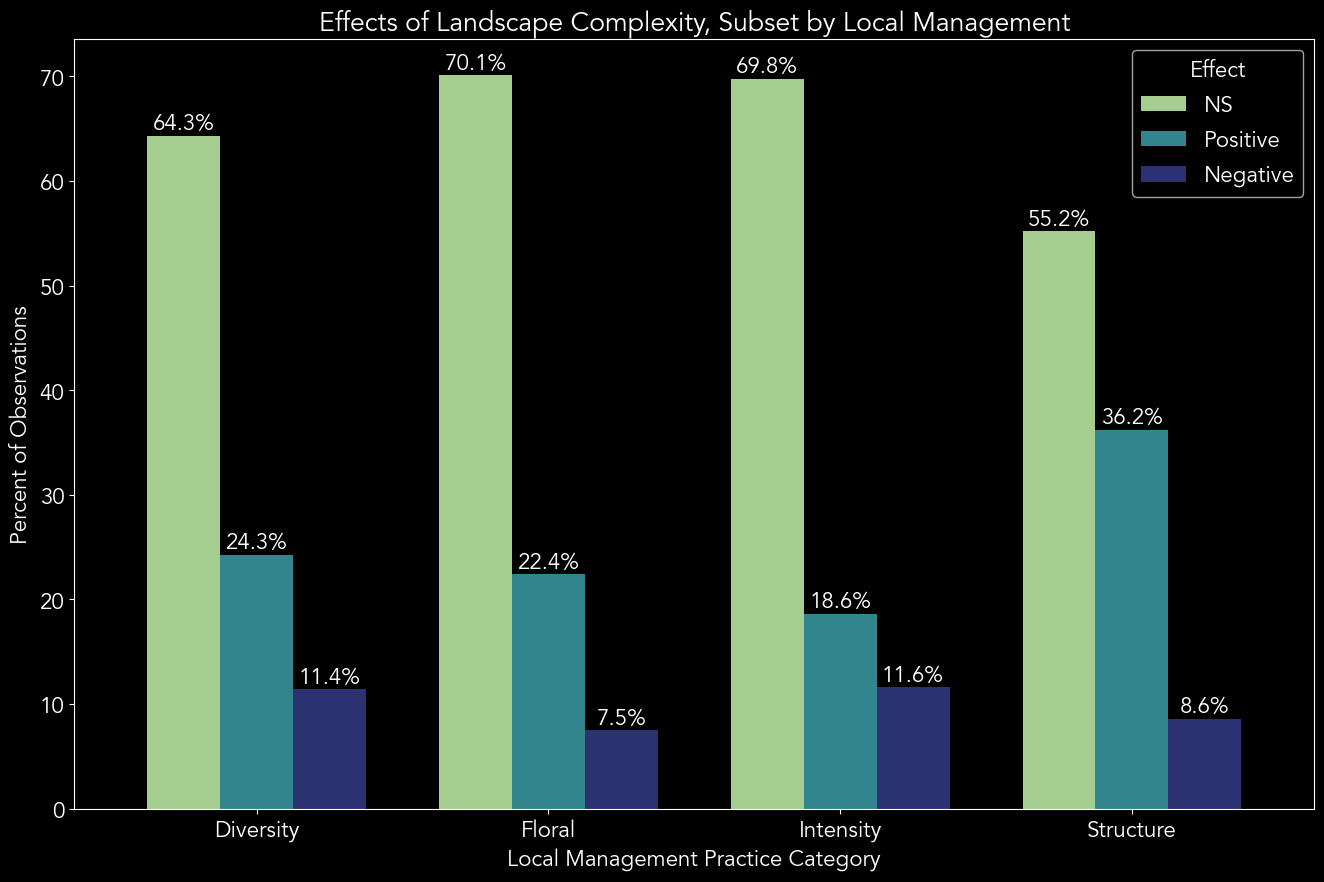

In [138]:
# Plotting effects of local practices across landscape gradients.

plt.style.use('dark_background')
plt.rcParams.update({'font.size': 16})

ax2 = (
    lit_review_data.groupby(["local_strategy"])[["landscape_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()[["NS", "Positive", "Negative"]]
    .plot(
        kind="bar",
        width=0.75,
        colormap="crest",
        title="Effects of Landscape Complexity, Subset by Local Management",
        ylabel="Percent of Observations",
        xlabel="Local Management Practice Category",
        rot=0,
        figsize=(16, 10),
    )
)

for container in ax2.containers:
    ax2.bar_label(container, fontsize=16, fmt="%.1f%%")

ax2.legend(title="Effect")


In [16]:
strategy_landscape_effect = (
    lit_review_data.groupby(["local_strategy"])[["landscape_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()[["NS", "Positive", "Negative"]]
    .T
)

strategy_landscape_effect


local_strategy,Diversity,Floral,Intensity,Structure
landscape_effect,,,,
NS,64.3,70.1,69.8,55.2
Positive,24.3,22.4,18.6,36.2
Negative,11.4,7.5,11.6,8.6


In [17]:
stats.chisquare(strategy_landscape_effect)


Power_divergenceResult(statistic=array([45.6482, 64.1606, 60.5768, 32.9432]), pvalue=array([1.22354322e-10, 1.16869916e-14, 7.01318046e-14, 7.02222939e-08]))

In [18]:
stats.chisquare(strategy_landscape_effect.T)


Power_divergenceResult(statistic=array([2.24348497, 6.82118227, 1.28158568]), pvalue=array([0.52343405, 0.07782105, 0.73351031]))

In [19]:
stats.chi2_contingency(strategy_landscape_effect)


Chi2ContingencyResult(statistic=10.346252909063761, pvalue=0.11080763261496468, dof=6, expected_freq=array([[64.85 , 64.85 , 64.85 , 64.85 ],
       [25.375, 25.375, 25.375, 25.375],
       [ 9.775,  9.775,  9.775,  9.775]]))

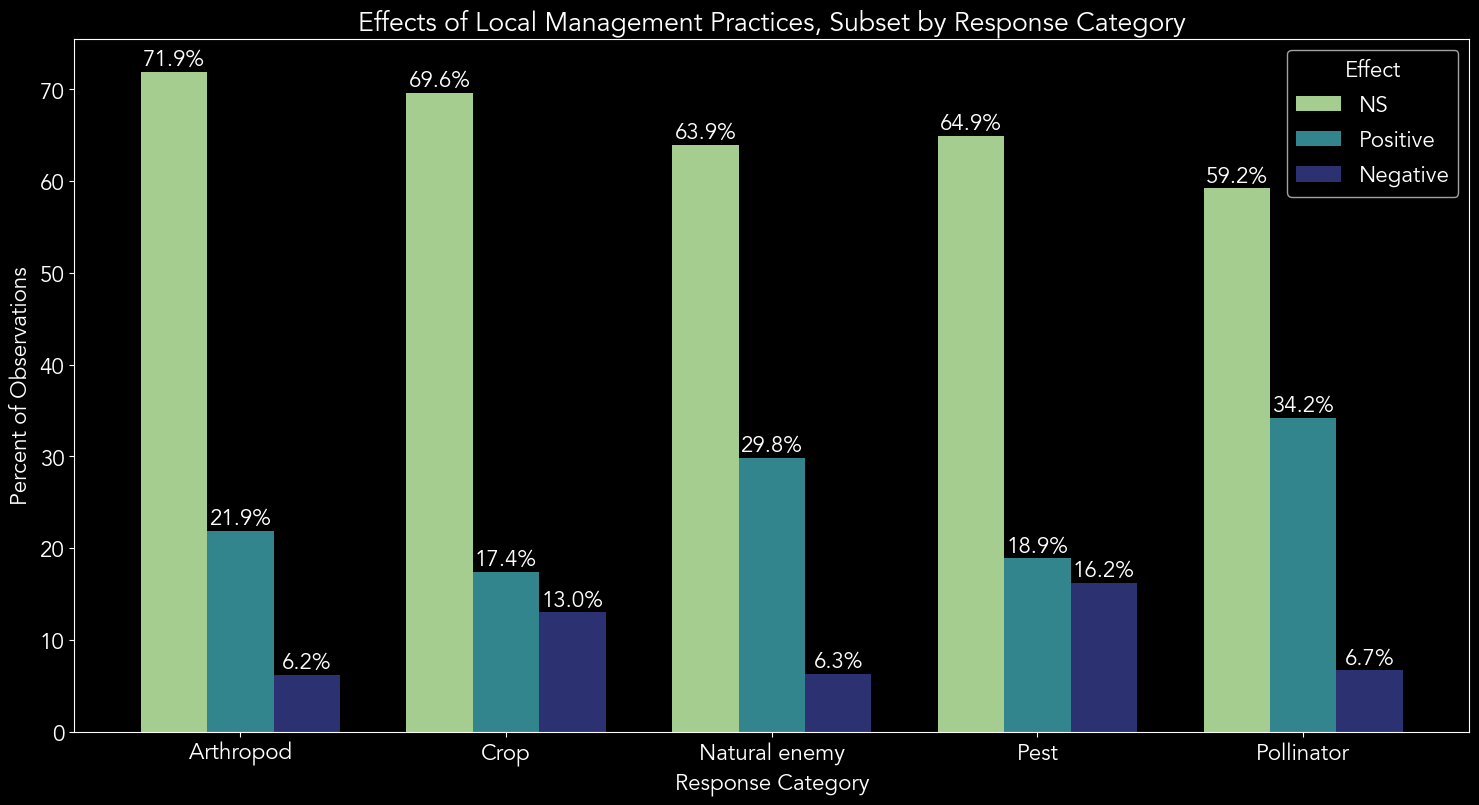

In [142]:
# Plotting effects of local practices for different response types.

plt.style.use('dark_background')
plt.rcParams.update({'font.size': 16})

ax3 = (
    lit_review_data.groupby(["response_category"])[["local_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()[["NS", "Positive", "Negative"]]
    .plot(
        kind="bar",
        width=0.75,
        colormap="crest",
        title="Effects of Local Management Practices, Subset by Response Category",
        ylabel="Percent of Observations",
        xlabel="Response Category",
        rot=0,
        figsize=(18, 9),
    )
)

for container in ax3.containers:
    ax3.bar_label(container, fontsize=16, fmt="%.1f%%")

ax3.legend(title="Effect")


In [21]:
response_local_effect = (
    lit_review_data.groupby(["response_category"])[["local_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()[["NS", "Positive", "Negative"]]
).T

response_local_effect


response_category,Arthropod,Crop,Natural enemy,Pest,Pollinator
local_effect,,,,,
NS,71.9,69.6,63.9,64.9,59.2
Positive,21.9,17.4,29.8,18.9,34.2
Negative,6.2,13.0,6.3,16.2,6.7


In [22]:
stats.chisquare(response_local_effect)


Power_divergenceResult(statistic=array([70.6298    , 59.4776    , 50.3282    , 44.9498    , 41.33366633]), pvalue=array([4.60186423e-16, 1.21507549e-13, 1.17861029e-11, 1.73490200e-10,
       1.05805537e-09]))

In [23]:
stats.chisquare(response_local_effect.T)


Power_divergenceResult(statistic=array([1.51107739, 8.6207856 , 8.87892562]), pvalue=array([0.82467745, 0.07130941, 0.06419805]))

In [24]:
stats.chi2_contingency(response_local_effect)


Chi2ContingencyResult(statistic=19.009019030638072, pvalue=0.01481148814479304, dof=8, expected_freq=array([[65.88682264, 65.88682264, 65.88682264, 65.88682264, 65.95270946],
       [24.43511298, 24.43511298, 24.43511298, 24.43511298, 24.45954809],
       [ 9.67806439,  9.67806439,  9.67806439,  9.67806439,  9.68774245]]))

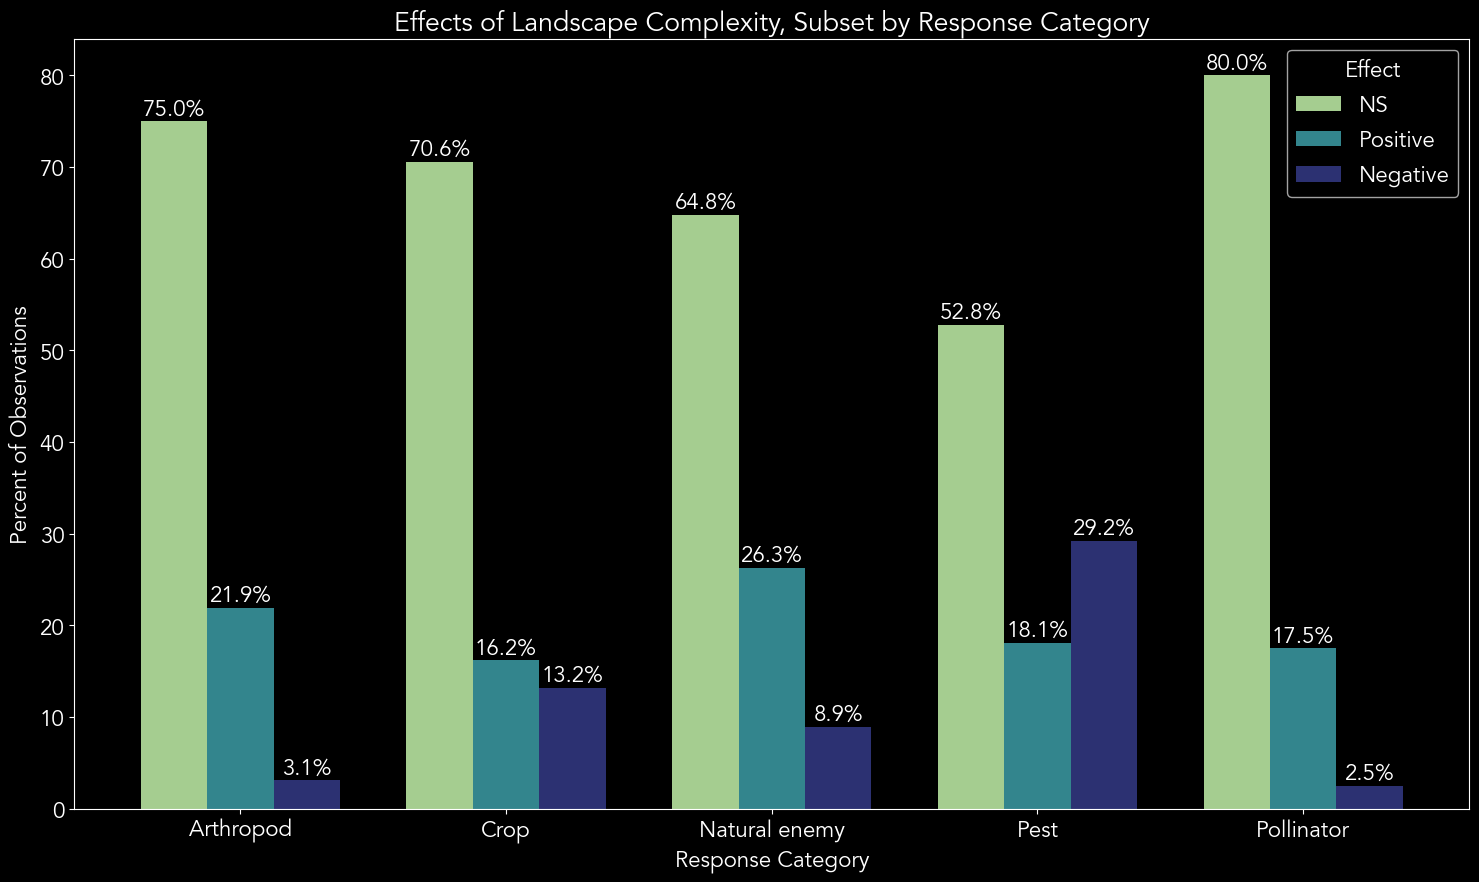

In [146]:
# Plotting effects of local practices across landscape gradients for different response types.

plt.style.use('dark_background')
plt.rcParams.update({'font.size': 16})

ax3 = (
    lit_review_data.groupby(["response_category"])[["landscape_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()[["NS", "Positive", "Negative"]]
    .plot(
        kind="bar",
        width=0.75,
        colormap="crest",
        title="Effects of Landscape Complexity, Subset by Response Category",
        ylabel="Percent of Observations",
        xlabel="Response Category",
        rot=0,
        figsize=(18, 10),
    )
)

for container in ax3.containers:
    ax3.bar_label(container, fontsize=16, fmt="%.1f%%")

ax3.legend(title="Effect")


In [26]:
response_landscape_effect = (
    lit_review_data.groupby(["response_category"])[["landscape_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()[["NS", "Positive", "Negative"]]
    .T
)

response_landscape_effect


response_category,Arthropod,Crop,Natural enemy,Pest,Pollinator
landscape_effect,,,,,
NS,75.0,70.6,64.8,52.8,80.0
Positive,21.9,16.2,26.3,18.1,17.5
Negative,3.1,13.2,8.9,29.2,2.5


In [27]:
stats.chisquare(response_landscape_effect)


Power_divergenceResult(statistic=array([ 83.4266    ,  62.6312    ,  49.0982    ,  18.82377622,
       101.375     ]), pvalue=array([7.65850478e-19, 2.51077458e-14, 2.18002430e-11, 8.17464551e-05,
       9.69836330e-23]))

In [28]:
stats.chisquare(response_landscape_effect.T)


Power_divergenceResult(statistic=array([ 6.3955711 ,  3.38      , 41.68963093]), pvalue=array([1.71490328e-01, 4.96357520e-01, 1.93446131e-08]))

In [29]:
stats.chi2_contingency(response_landscape_effect)


Chi2ContingencyResult(statistic=51.44370018481724, pvalue=2.15504769694293e-08, dof=8, expected_freq=array([[68.62627475, 68.62627475, 68.62627475, 68.69490102, 68.62627475],
       [19.9960008 , 19.9960008 , 19.9960008 , 20.0159968 , 19.9960008 ],
       [11.37772446, 11.37772446, 11.37772446, 11.38910218, 11.37772446]]))

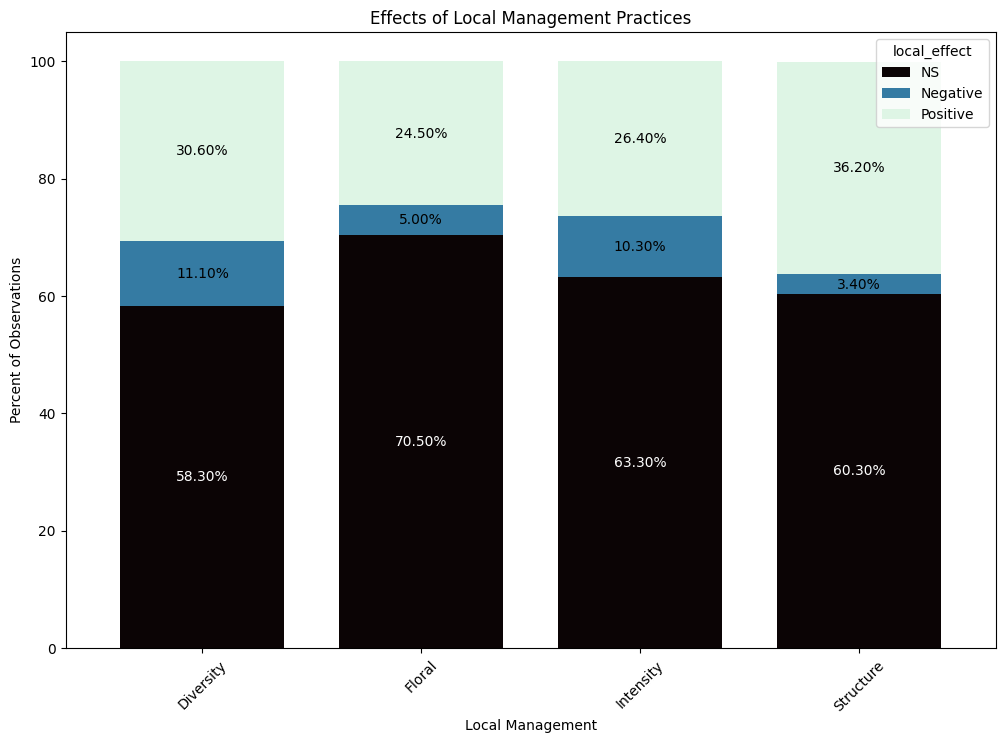

In [30]:
# Plotting effects of local management.

ax5 = (
    lit_review_data.groupby(["local_strategy"])[["local_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()
    .plot(
        kind="bar",
        stacked=True,
        width=0.75,
        colormap="mako",
        title="Effects of Local Management Practices",
        ylabel="Percent of Observations",
        xlabel="Local Management",
        rot=45,
        figsize=(12, 8),
    )
)

label_colors = ["white", "black", "black"]

for i, container in enumerate(ax5.containers):
    ax5.bar_label(
        container, fontsize=10, label_type="center", fmt="%.2f%%", color=label_colors[i]
    )


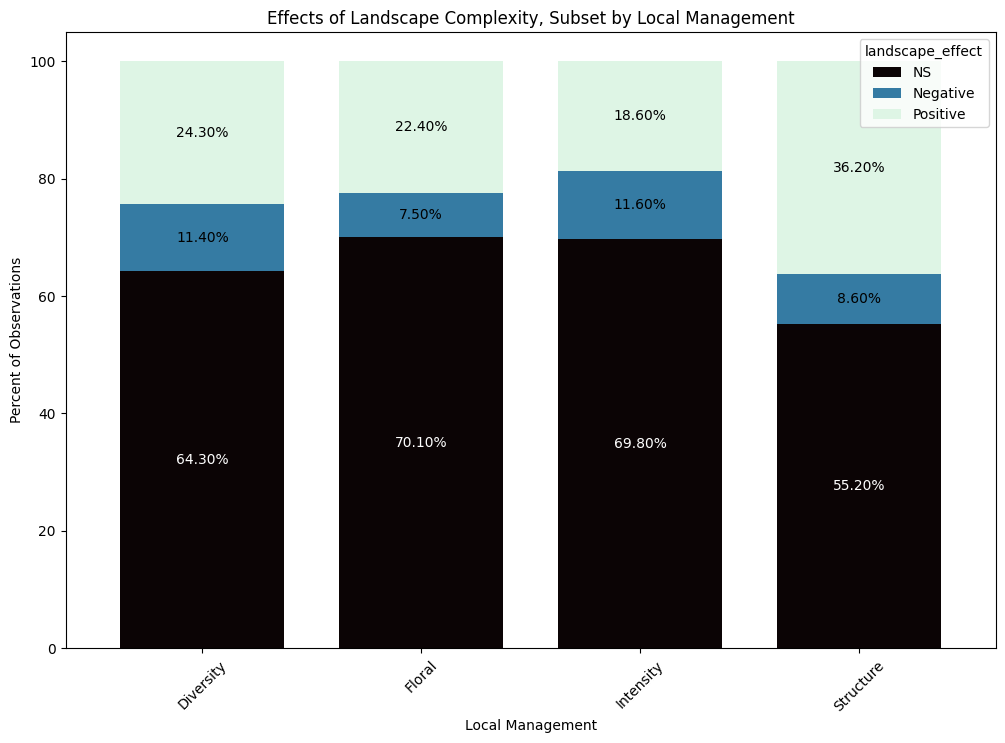

In [31]:
# Plotting effects of local management across landscape gradients.

ax6 = (
    lit_review_data.groupby(["local_strategy"])[["landscape_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()
    .plot(
        kind="bar",
        stacked=True,
        width=0.75,
        colormap="mako",
        title="Effects of Landscape Complexity, Subset by Local Management",
        ylabel="Percent of Observations",
        xlabel="Local Management",
        rot=45,
        figsize=(12, 8),
    )
)

label_colors = ["white", "black", "black"]

for i, container in enumerate(ax6.containers):
    ax6.bar_label(
        container, fontsize=10, label_type="center", fmt="%.2f%%", color=label_colors[i]
    )


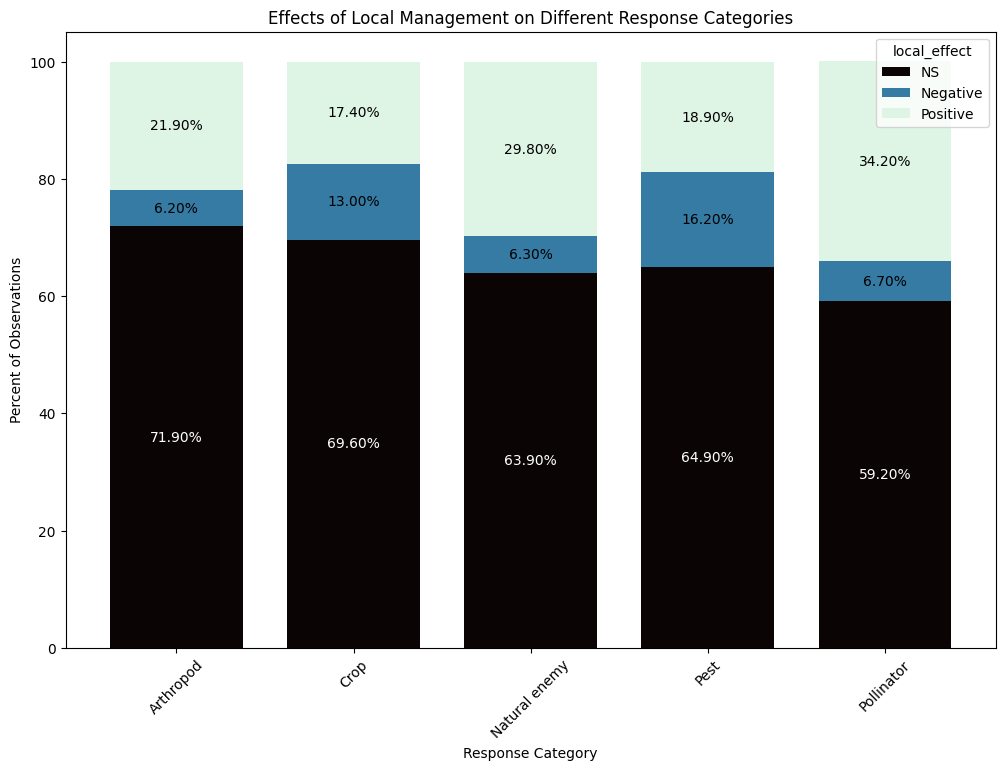

In [32]:
# Plotting effects of local management on different response types.

ax7 = (
    lit_review_data.groupby(["response_category"])[["local_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()
    .plot(
        kind="bar",
        stacked=True,
        width=0.75,
        colormap="mako",
        title="Effects of Local Management on Different Response Categories",
        ylabel="Percent of Observations",
        xlabel="Response Category",
        rot=45,
        figsize=(12, 8),
    )
)

label_colors = ["white", "black", "black"]

for i, container in enumerate(ax7.containers):
    ax7.bar_label(
        container, fontsize=10, label_type="center", fmt="%.2f%%", color=label_colors[i]
    )


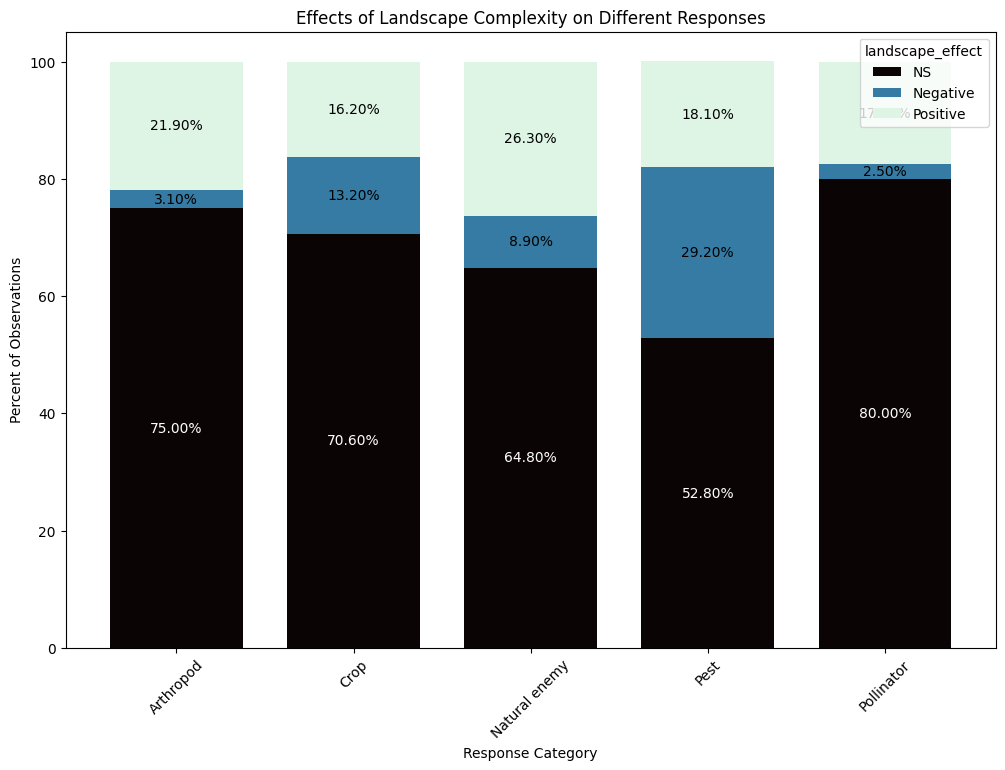

In [33]:
# Plotting effects of local management across landscape gradients on different response types.

ax8 = (
    lit_review_data.groupby(["response_category"])[["landscape_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()
    .plot(
        kind="bar",
        stacked=True,
        width=0.75,
        colormap="mako",
        title="Effects of Landscape Complexity on Different Responses",
        ylabel="Percent of Observations",
        xlabel="Response Category",
        rot=45,
        figsize=(12, 8),
    )
)

label_colors = ["white", "black", "black"]

for i, container in enumerate(ax8.containers):
    ax8.bar_label(
        container, fontsize=10, label_type="center", fmt="%.2f%%", color=label_colors[i]
    )


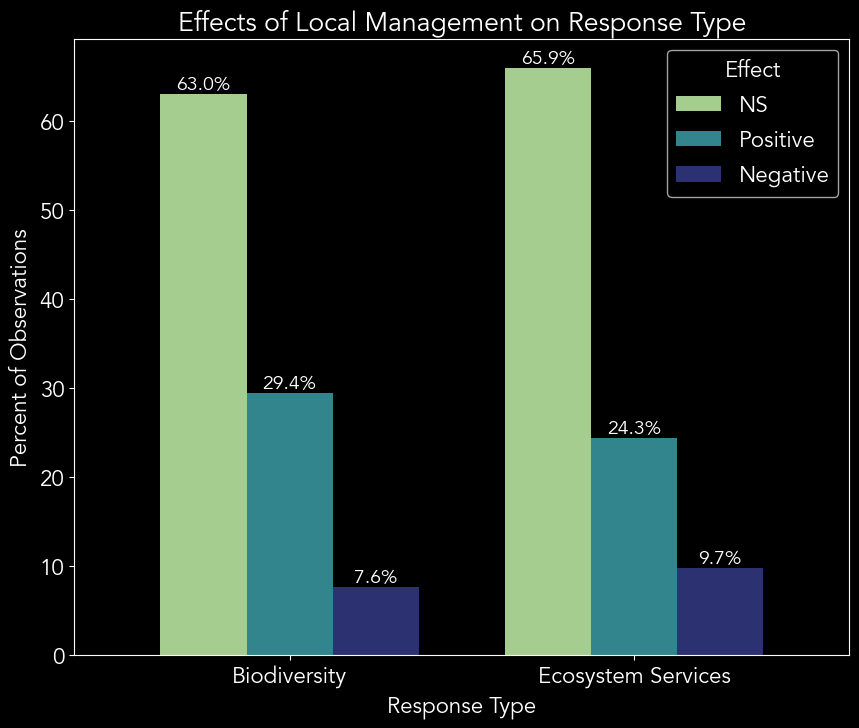

In [127]:
# Plotting local effects of local practices.

plt.style.use('dark_background')
plt.rcParams.update({'font.size': 16})

ax9 = (
    lit_review_data.groupby(["response_type"])[["local_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()[["NS", "Positive", "Negative"]]
    .plot(
        kind="bar",
        width=0.75,
        colormap="crest",
        title="Effects of Local Management on Response Type",
        ylabel="Percent of Observations",
        xlabel="Response Type",
        rot=0,
        figsize=(10, 8),
    )
)

for container in ax9.containers:
    ax9.bar_label(container, fontsize=14, fmt="%.1f%%")

ax9.legend(title="Effect")


In [35]:
response_type_local_effect = (
    lit_review_data.groupby(["response_type"])[["local_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()[["NS", "Positive", "Negative"]]
    .T
)

response_type_local_effect


response_type,Biodiversity,Ecosystem Services
local_effect,,
NS,63.0,65.9
Positive,29.4,24.3
Negative,7.6,9.7


In [36]:
stats.chisquare(response_type_local_effect)


Power_divergenceResult(statistic=array([46.7336    , 51.07267267]), pvalue=array([7.11095123e-11, 8.12288007e-12]))

In [37]:
stats.chisquare(response_type_local_effect.T)


Power_divergenceResult(statistic=array([0.06524438, 0.48435754, 0.25491329]), pvalue=array([0.79839117, 0.48645513, 0.61363653]))

In [38]:
stats.chi2_contingency(response_type_local_effect)


Chi2ContingencyResult(statistic=0.8044653884871102, pvalue=0.6688250958318906, dof=2, expected_freq=array([[64.48224112, 64.41775888],
       [26.86343172, 26.83656828],
       [ 8.65432716,  8.64567284]]))

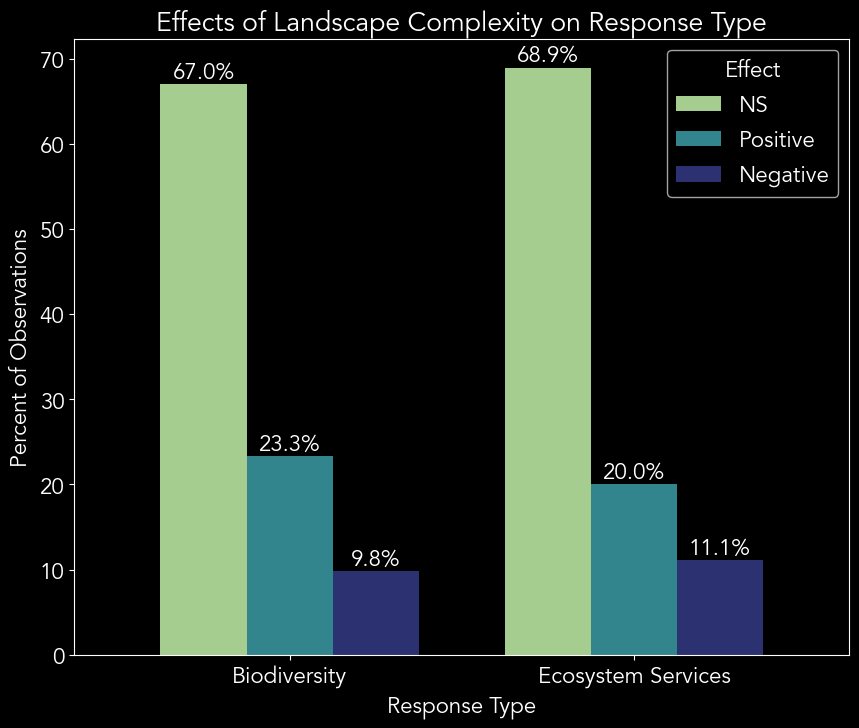

In [129]:
# Plotting local effects of local practices.

plt.style.use('dark_background')
plt.rcParams.update({'font.size': 16})

ax10 = (
    lit_review_data.groupby(["response_type"])[["landscape_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()[["NS", "Positive", "Negative"]]
    .plot(
        kind="bar",
        width=0.75,
        colormap="crest",
        title="Effects of Landscape Complexity on Response Type",
        ylabel="Percent of Observations",
        xlabel="Response Type",
        rot=0,
        figsize=(10, 8),
    )
)

for container in ax10.containers:
    ax10.bar_label(container, fontsize=16, fmt="%.1f%%")

ax10.legend(title="Effect")


In [40]:
response_type_landscape_effect = (
    lit_review_data.groupby(["response_type"])[["landscape_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()[["NS", "Positive", "Negative"]]
    .T
)

response_type_landscape_effect


response_type,Biodiversity,Ecosystem Services
landscape_effect,,
NS,67.0,68.9
Positive,23.3,20.0
Negative,9.8,11.1


In [41]:
stats.chisquare(response_type_landscape_effect)


Power_divergenceResult(statistic=array([53.58421578, 58.1126    ]), pvalue=array([2.31385097e-12, 2.40441399e-13]))

In [42]:
stats.chisquare(response_type_landscape_effect.T)


Power_divergenceResult(statistic=array([0.02656365, 0.25150115, 0.08086124]), pvalue=array([0.87053136, 0.61602005, 0.77613365]))

In [43]:
stats.chi2_contingency(response_type_landscape_effect)


Chi2ContingencyResult(statistic=0.3588761631129029, pvalue=0.8357396970423747, dof=2, expected_freq=array([[67.98395802, 67.91604198],
       [21.66081959, 21.63918041],
       [10.45522239, 10.44477761]]))

**Mako Color Hex Codes**

- '0B0405'  
- '357BA3'  
- 'DEF5E5'

In [44]:
lit_review_data.insert(
    loc=14,
    column="gradient_range",
    value=lit_review_data["maximum_complexity"] - lit_review_data["minimum_complexity"],
)


Text(0, 0.5, 'Number of Observations')

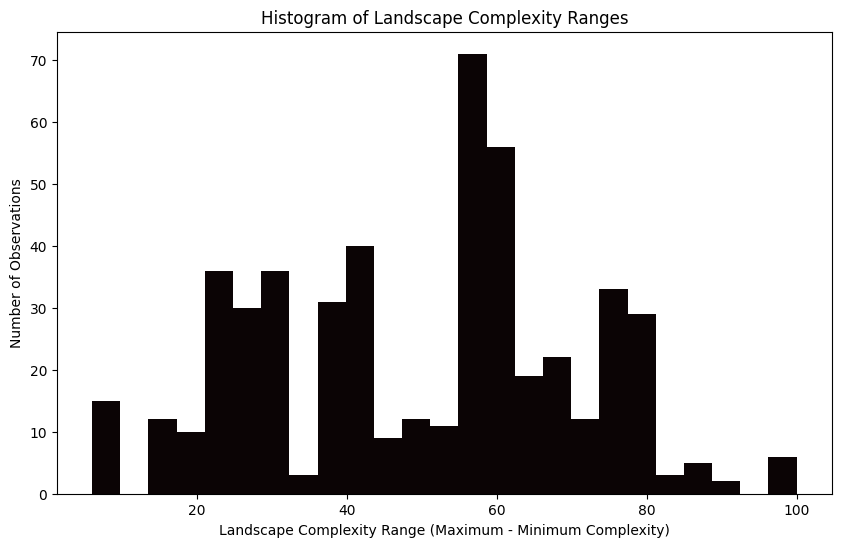

In [45]:
plt.figure(figsize=(10, 6))
plt.title("Histogram of Landscape Complexity Ranges")

plt.hist(
    lit_review_data["gradient_range"], alpha=1, label="NS", bins=25, color="#0B0405"
)

plt.xlabel("Landscape Complexity Range (Maximum - Minimum Complexity)")
plt.ylabel("Number of Observations")


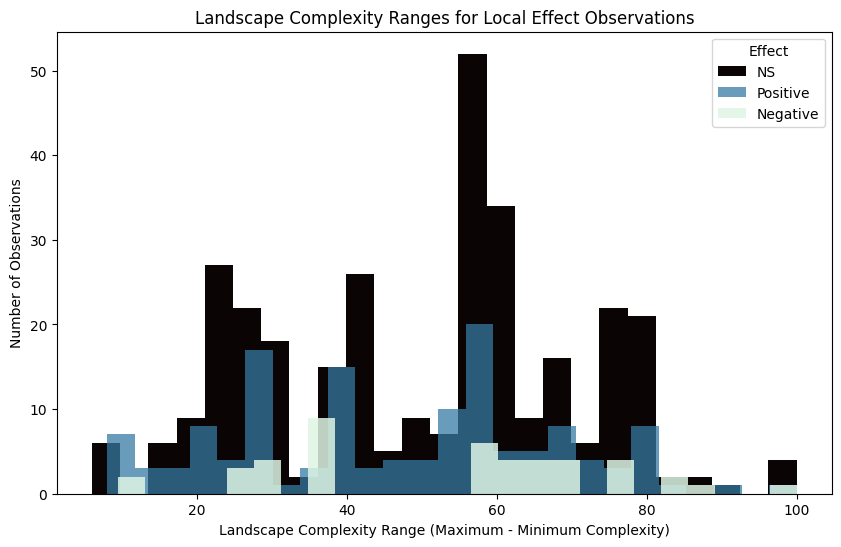

In [46]:
# Gradient ranges for local effect observations

plt.figure(figsize=(10, 6))
plt.title("Landscape Complexity Ranges for Local Effect Observations")

plt.hist(
    lit_review_data.where(lit_review_data["local_effect"] == "NS")["gradient_range"],
    alpha=1,
    label="NS",
    bins=25,
    color="#0B0405",
)

plt.hist(
    lit_review_data.where(lit_review_data["local_effect"] == "Positive")[
        "gradient_range"
    ],
    alpha=0.75,
    label="Positive",
    bins=25,
    color="#357BA3",
)

plt.hist(
    lit_review_data.where(lit_review_data["local_effect"] == "Negative")[
        "gradient_range"
    ],
    alpha=0.85,
    label="Negative",
    bins=25,
    color="#DEF5E5",
)

plt.legend(title="Effect", loc="upper right")
plt.xlabel("Landscape Complexity Range (Maximum - Minimum Complexity)")
plt.ylabel("Number of Observations")
plt.show()


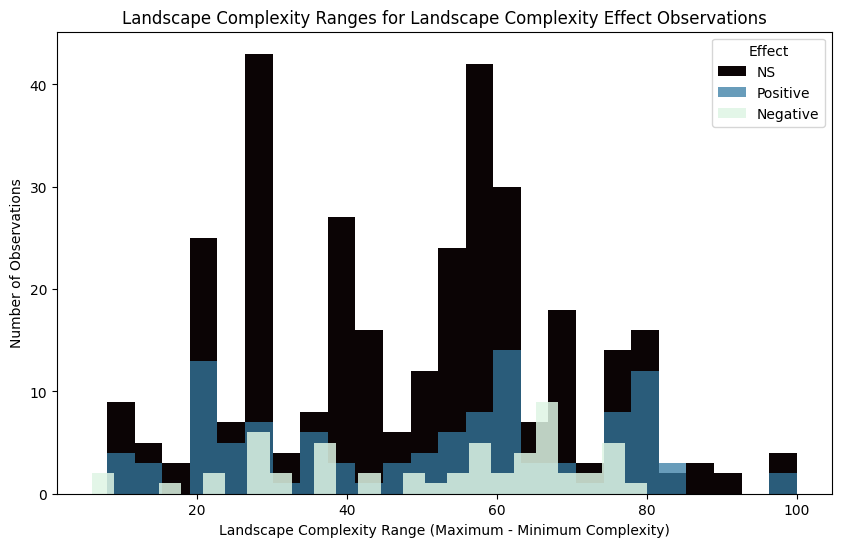

In [47]:
# Gradient ranges for landscape complexity effect observations

plt.figure(figsize=(10, 6))
plt.title("Landscape Complexity Ranges for Landscape Complexity Effect Observations")

plt.hist(
    lit_review_data.where(lit_review_data["landscape_effect"] == "NS")[
        "gradient_range"
    ],
    alpha=1,
    label="NS",
    bins=25,
    color="#0B0405",
)

plt.hist(
    lit_review_data.where(lit_review_data["landscape_effect"] == "Positive")[
        "gradient_range"
    ],
    alpha=0.75,
    label="Positive",
    bins=25,
    color="#357BA3",
)

plt.hist(
    lit_review_data.where(lit_review_data["landscape_effect"] == "Negative")[
        "gradient_range"
    ],
    alpha=0.85,
    label="Negative",
    bins=25,
    color="#DEF5E5",
)

plt.legend(title="Effect", loc="upper right")
plt.xlabel("Landscape Complexity Range (Maximum - Minimum Complexity)")
plt.ylabel("Number of Observations")
plt.show()


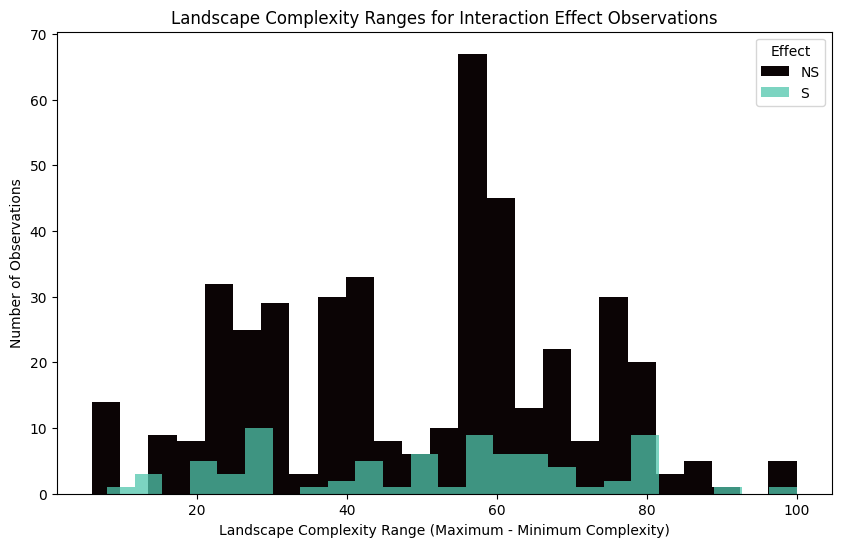

In [48]:
# Gradient ranges for interaction effect

plt.figure(figsize=(10, 6))
plt.title("Landscape Complexity Ranges for Interaction Effect Observations")

plt.hist(
    lit_review_data.where(lit_review_data["interaction_effect"] == "NS")[
        "gradient_range"
    ],
    alpha=1,
    label="NS",
    bins=25,
    color="#0B0405",
)

plt.hist(
    lit_review_data.where(lit_review_data["interaction_effect"] == "S")[
        "gradient_range"
    ],
    alpha=0.75,
    label="S",
    bins=25,
    color="#50c6ac",
)

plt.legend(title="Effect", loc="upper right")
plt.xlabel("Landscape Complexity Range (Maximum - Minimum Complexity)")
plt.ylabel("Number of Observations")
plt.show()


In [49]:
gradient_range_array = lit_review_data.gradient_range.sort_values(ascending=True)

gradient_range_array[np.logical_not(np.isnan(gradient_range_array))].value_counts()


57.87    24
80.00    24
30.00    23
28.00    22
55.00    22
         ..
53.40     1
51.00     1
47.00     1
32.80     1
6.00      1
Name: gradient_range, Length: 72, dtype: int64

In [50]:
interaction_data = pd.read_csv("lit_review_interactions.csv")
interaction_data


,Title,Author,Year,Comparison,Response,Response Type,Response Category,Local Factor,Local Strategy,Local Effect,Landscape,Landscape Gradient,Landscape Effect,Interaction Details,Interaction Effect,Simple,Intermediate,Complex,Description
0,Agricultural intensification and biodiversity ...,Flohre et al.,2011,Conventional,Beta diversity (carabids),Biodiversity,Natural enemy,Agricultural intensification (low to high),Intensity,Negative,"Percentage of agricultural fields, which is cl...",NaN,NS,Medium intensity has a negative effect on dive...,More negative local effect in complex landscapes,NS,Negative,NS,β diversities of carabids were only decreased ...
1,Agricultural landscape composition affects the...,Gervais et al.,2020,Conventional,Pollen load diversity,Ecosystem Services,Pollinator,Local floral species richness,Floral,NS,We determined landscape structure within a 1 k...,0-24% non-intensive,NS,"Positive when local species richness was high,...",More positive local effect in complex landscapes,Negative,Positive,Positive,Landscape composition as well as local floral ...
2,"Agroecological farming, flowering phenology an...",Monticelli et al.,2022,Control,Seed yield/plant C. segetum,Ecosystem Services,Crop,Local floral species richness,Floral,NS,"Within a radius of 300 m of each plot, we quan...",5-34% semi-natural habitat,Positive,Positive effect of local factor in more comple...,More positive local effect in complex landscapes,NS,Positive,Positive,C. segetum seed yield increased with flowering...
3,"Agroecological farming, flowering phenology an...",Monticelli et al.,2022,Control,Pollinator abundance C. segetum,Biodiversity,Pollinator,Local floral species richness,Floral,Positive,"Within a radius of 300 m of each plot, we quan...",5-34% semi-natural habitat,Negative,Positive effect of local factor in more simple...,More positive local effect in simple landscapes,Positive,Positive,Negative,The abundance of pollinators on C. segetum rel...
4,"Agroecological farming, flowering phenology an...",Monticelli et al.,2022,Control,Pollinator abundance C. jacea,Biodiversity,Pollinator,Local floral species richness,Floral,NS,"Within a radius of 300 m of each plot, we quan...",5-34% semi-natural habitat,NS,Positive effect of local factor in more simple...,More positive local effect in simple landscapes,Positive,Negative,Negative,A significant interaction revealed that C. seg...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,The effect of organic farming on butterfly div...,Rundlof & Smith,2006,Conventional,Butterfly richness,Biodiversity,Pollinator,Organic,Intensity,Positive,Proportion of arable land and occurrence of gr...,Arable land ~15-70% (inverse into non-arable),Positive,More positive in homogenous ~30% non-arable land,More positive local effect in simple landscapes,Positive,NS,NS,Both species richness and abundance of butterf...
79,The effect of organic farming on butterfly div...,Rundlof & Smith,2006,Conventional,Butterfly abundance,Biodiversity,Pollinator,Organic,Intensity,Positive,Proportion of arable land and occurrence of gr...,Arable land ~15-70% (inverse into non-arable),Positive,More positive in homogenous ~30% non-arable land,More positive local effect in simple landscapes,Positive,NS,NS,Both species richness and abundance of butterf...
80,The taxon- and functional trait-dependent effe...,Zhang et al.,2020,Control,Abundance (spider),Biodiversity,Natural enemy,"Field margins (grassy strip, poplar woodland, ...",Structure,NS,SNHs were further differentiated into wooded a...,2.4-23.8% woodland,Negative,"Positive in grassy and woodland margins, negat...",More positive local effect in complex landscapes,Negative,NS,Positive,An interaction effect between landscape compos...
81,Unpacking the push-pull system: Assessing the ...,Kebede et al.,2018,Control,Stemborer infestation,Biodiversity,Pest,Push-pull,Diversity,NS,We selected representative landscapes in three...,25-75% perennial/semi-natural,

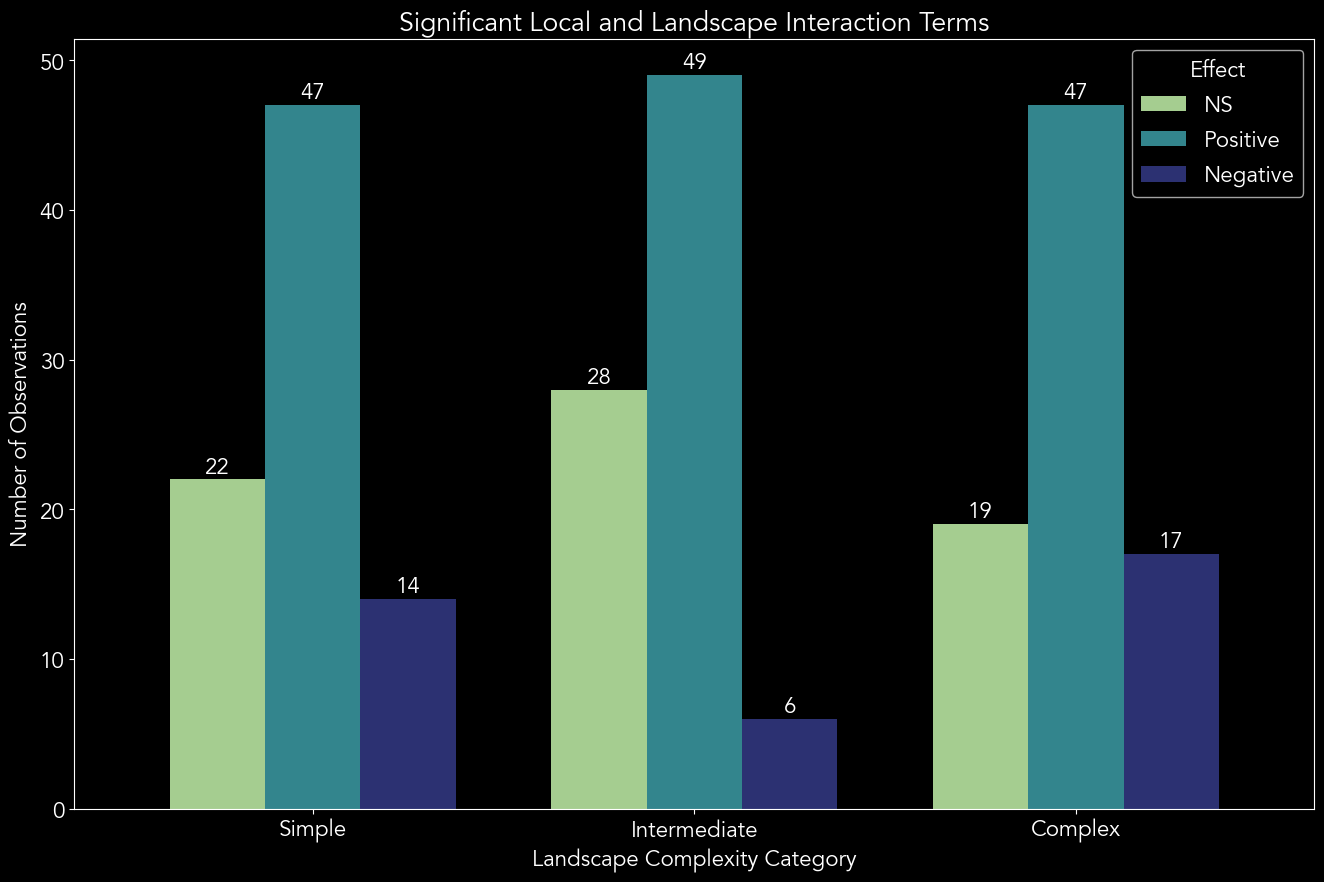

In [153]:
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 16})

ax11 = (
    interaction_data[["Simple", "Intermediate", "Complex"]]
    .apply(pd.Series.value_counts)
    .T[["NS", "Positive", "Negative"]]
    .plot(
        kind="bar",
        colormap="crest",
        width=0.75,
        title="Significant Local and Landscape Interaction Terms",
        ylabel="Number of Observations",
        xlabel="Landscape Complexity Category",
        rot=0,
        figsize=(16, 10),
    )
)

for container in ax11.containers:
    ax11.bar_label(container, fontsize=16)

ax11.legend(title="Effect")


In [52]:
all_interactions = (
    interaction_data[["Simple", "Intermediate", "Complex"]]
    .apply(pd.Series.value_counts)
    .T[["NS", "Positive", "Negative"]]
    .T
)

all_interactions


,Simple,Intermediate,Complex
NS,22,28,19
Positive,47,49,47
Negative,14,6,17


In [53]:
stats.chisquare(all_interactions)


Power_divergenceResult(statistic=array([21.42168675, 33.42168675, 20.3373494 ]), pvalue=array([2.23017954e-05, 5.52806238e-08, 3.83531192e-05]))

In [54]:
stats.chisquare(all_interactions.T)


Power_divergenceResult(statistic=array([1.82608696, 0.05594406, 5.24324324]), pvalue=array([0.40130101, 0.97241557, 0.0726849 ]))

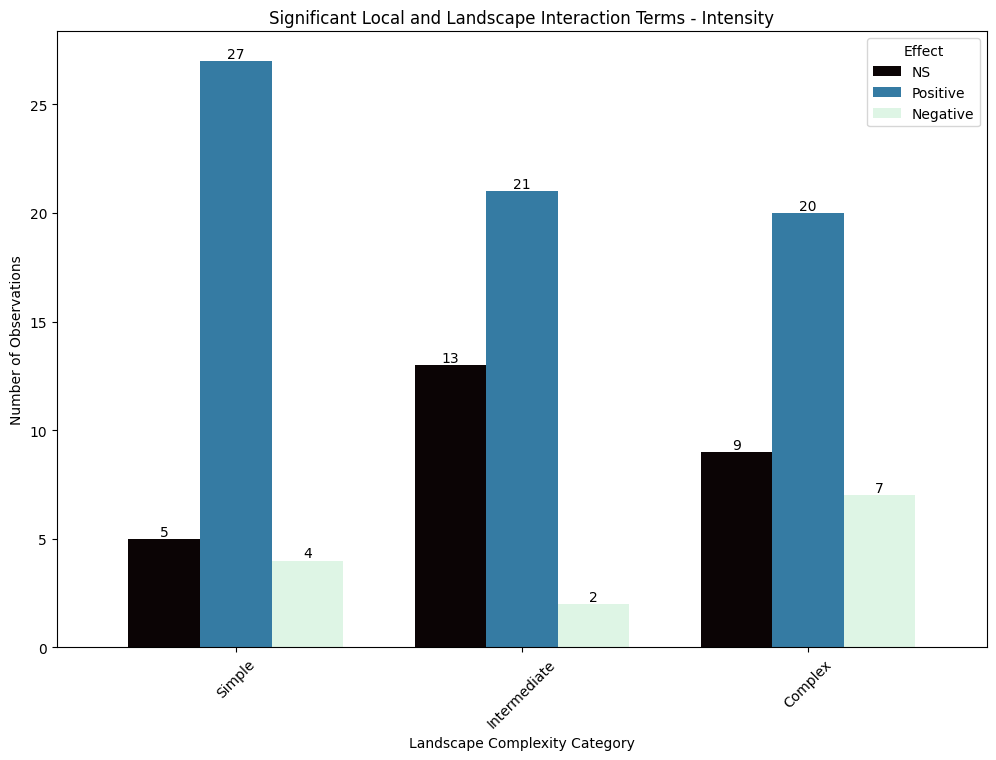

In [55]:
ax = (
    interaction_data.where(interaction_data["Local Strategy"] == "Intensity")[
        ["Simple", "Intermediate", "Complex"]
    ]
    .apply(pd.Series.value_counts)
    .T[["NS", "Positive", "Negative"]]
    .plot(
        kind="bar",
        colormap="mako",
        width=0.75,
        title="Significant Local and Landscape Interaction Terms - Intensity",
        ylabel="Number of Observations",
        xlabel="Landscape Complexity Category",
        rot=45,
        figsize=(12, 8),
    )
)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

ax.legend(title="Effect")


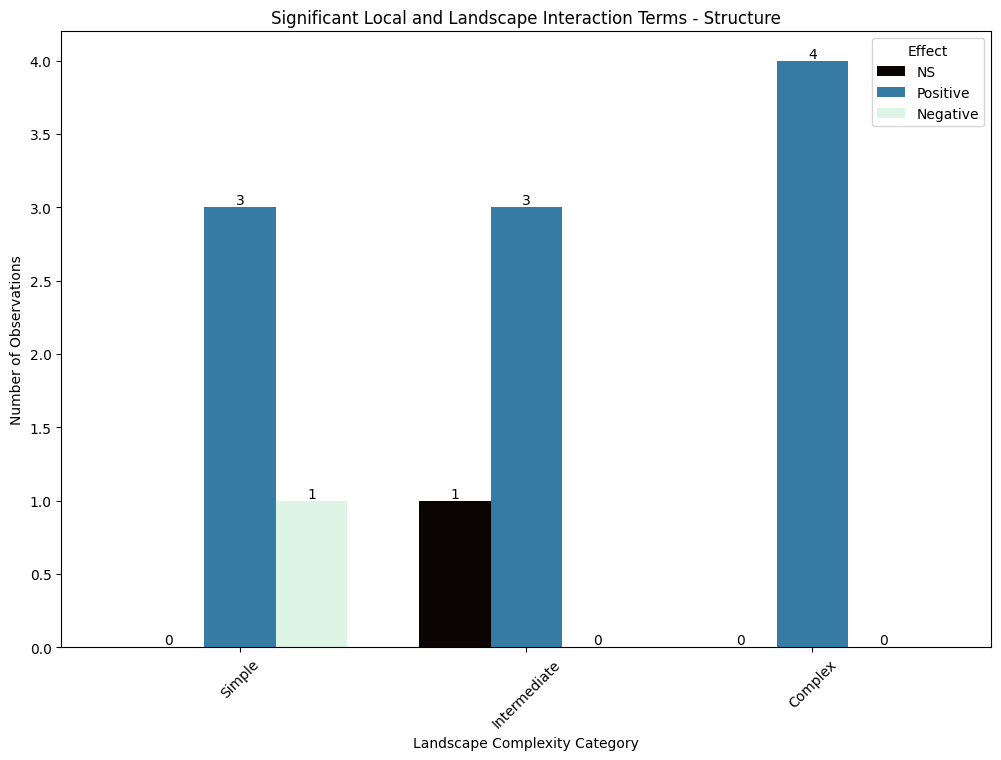

In [56]:
ax = (
    interaction_data.where(interaction_data["Local Strategy"] == "Structure")[
        ["Simple", "Intermediate", "Complex"]
    ]
    .apply(pd.Series.value_counts)
    .T[["NS", "Positive", "Negative"]]
    .plot(
        kind="bar",
        colormap="mako",
        width=0.75,
        title="Significant Local and Landscape Interaction Terms - Structure",
        ylabel="Number of Observations",
        xlabel="Landscape Complexity Category",
        rot=45,
        figsize=(12, 8),
    )
)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

ax.legend(title="Effect")


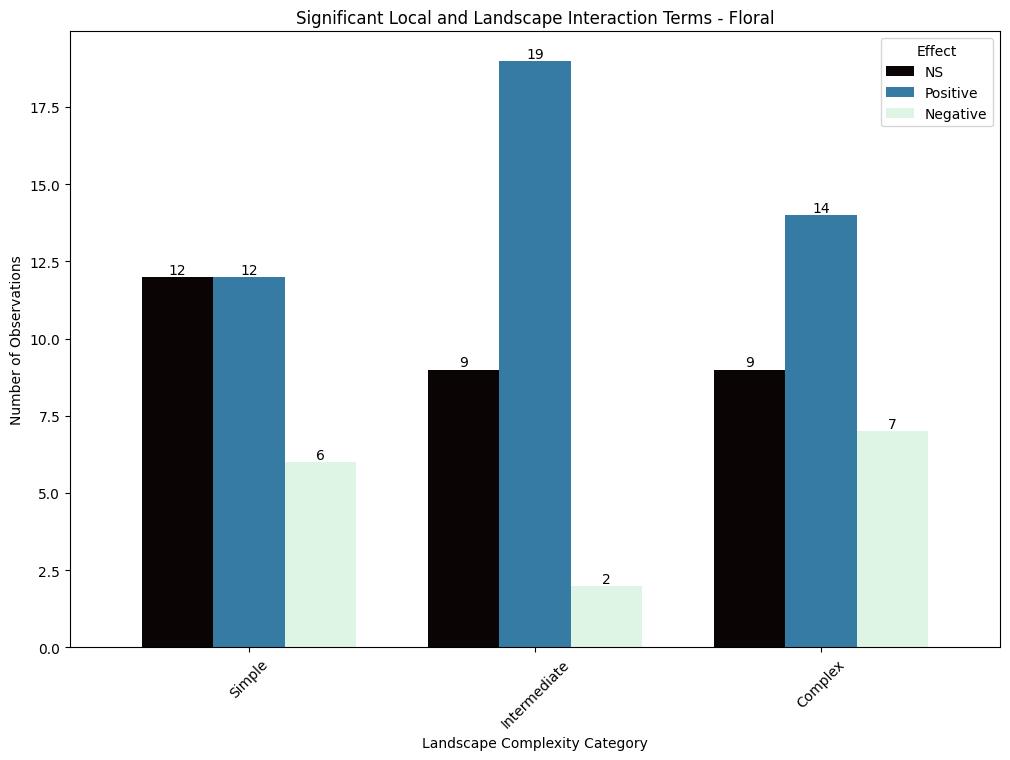

In [57]:
ax = (
    interaction_data.where(interaction_data["Local Strategy"] == "Floral")[
        ["Simple", "Intermediate", "Complex"]
    ]
    .apply(pd.Series.value_counts)
    .T[["NS", "Positive", "Negative"]]
    .plot(
        kind="bar",
        colormap="mako",
        width=0.75,
        title="Significant Local and Landscape Interaction Terms - Floral",
        ylabel="Number of Observations",
        xlabel="Landscape Complexity Category",
        rot=45,
        figsize=(12, 8),
    )
)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

ax.legend(title="Effect")


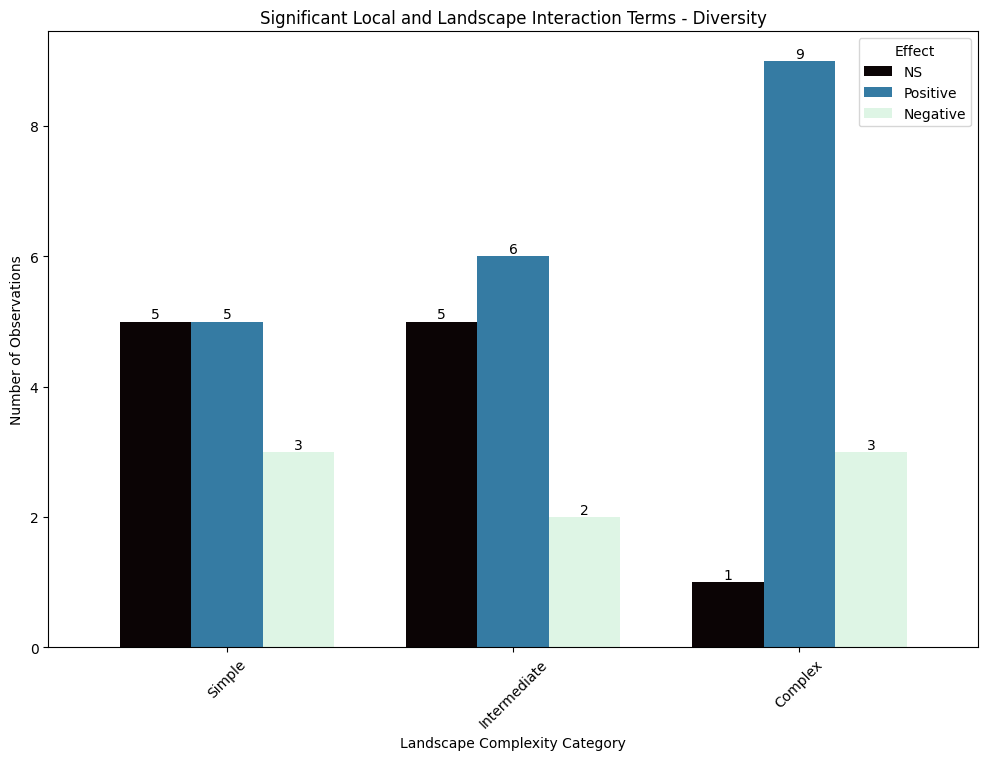

In [58]:
ax = (
    interaction_data.where(interaction_data["Local Strategy"] == "Diversity")[
        ["Simple", "Intermediate", "Complex"]
    ]
    .apply(pd.Series.value_counts)
    .T[["NS", "Positive", "Negative"]]
    .plot(
        kind="bar",
        colormap="mako",
        width=0.75,
        title="Significant Local and Landscape Interaction Terms - Diversity",
        ylabel="Number of Observations",
        xlabel="Landscape Complexity Category",
        rot=45,
        figsize=(12, 8),
    )
)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

ax.legend(title="Effect")


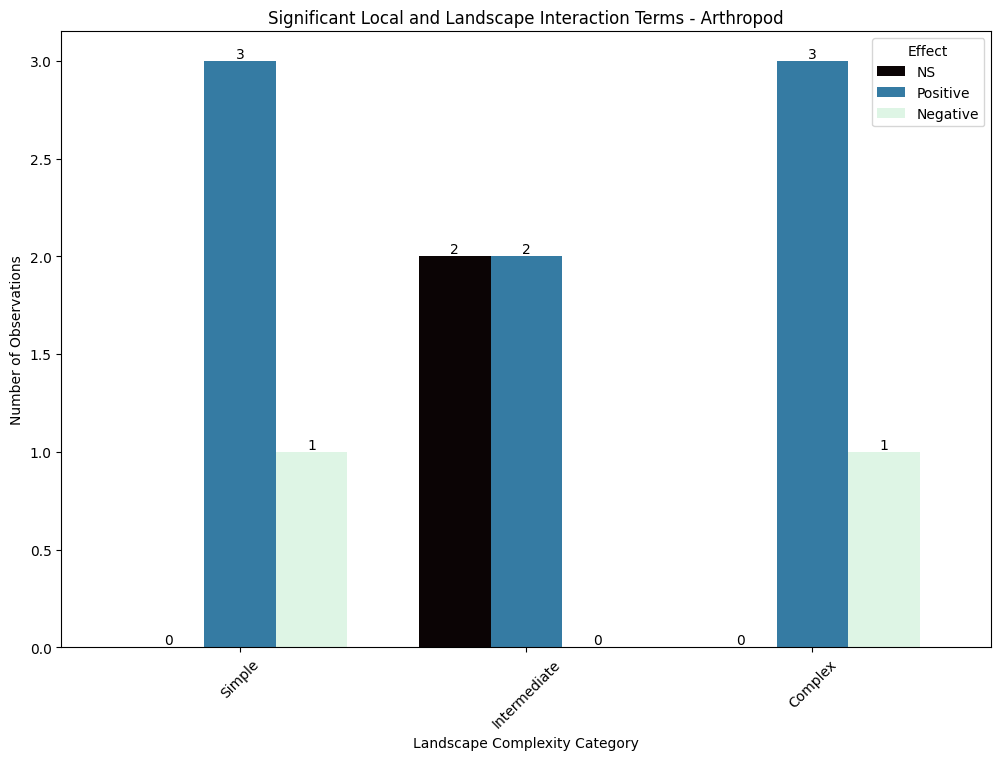

In [59]:
ax = (
    interaction_data.where(interaction_data["Response Category"] == "Arthropod")[
        ["Simple", "Intermediate", "Complex"]
    ]
    .apply(pd.Series.value_counts)
    .T[["NS", "Positive", "Negative"]]
    .plot(
        kind="bar",
        colormap="mako",
        width=0.75,
        title="Significant Local and Landscape Interaction Terms - Arthropod",
        ylabel="Number of Observations",
        xlabel="Landscape Complexity Category",
        rot=45,
        figsize=(12, 8),
    )
)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

ax.legend(title="Effect")


In [60]:
arthropod_interactions = (
    interaction_data.where(interaction_data["Response Category"] == "Arthropod")[
        ["Simple", "Intermediate", "Complex"]
    ]
    .apply(pd.Series.value_counts)
    .T[["NS", "Positive", "Negative"]]
    .fillna(0)
    .T
)

arthropod_interactions


,Simple,Intermediate,Complex
NS,0.0,2.0,0.0
Positive,3.0,2.0,3.0
Negative,1.0,0.0,1.0


In [61]:
stats.chisquare(arthropod_interactions)


Power_divergenceResult(statistic=array([3.5, 2. , 3.5]), pvalue=array([0.17377394, 0.36787944, 0.17377394]))

In [62]:
stats.chisquare(arthropod_interactions.T)


Power_divergenceResult(statistic=array([4.  , 0.25, 1.  ]), pvalue=array([0.13533528, 0.8824969 , 0.60653066]))

In [63]:
stats.chi2_contingency(arthropod_interactions)


Chi2ContingencyResult(statistic=5.250000000000001, pvalue=0.2625941192491615, dof=4, expected_freq=array([[0.66666667, 0.66666667, 0.66666667],
       [2.66666667, 2.66666667, 2.66666667],
       [0.66666667, 0.66666667, 0.66666667]]))

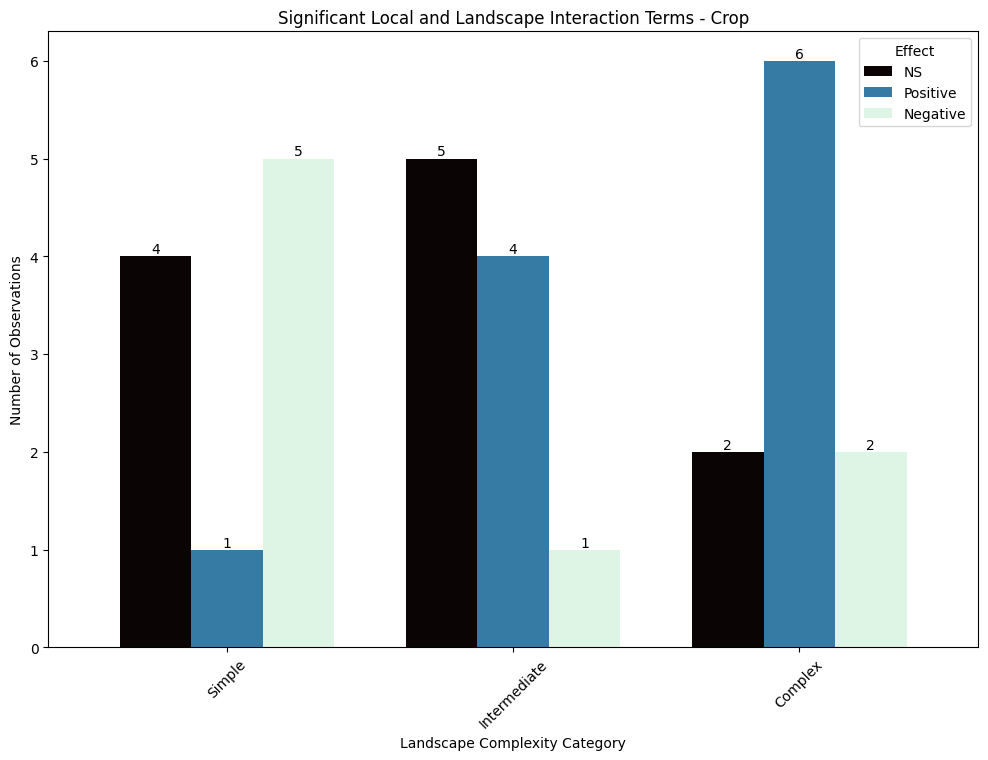

In [64]:
ax = (
    interaction_data.where(interaction_data["Response Category"] == "Crop")[
        ["Simple", "Intermediate", "Complex"]
    ]
    .apply(pd.Series.value_counts)
    .T[["NS", "Positive", "Negative"]]
    .plot(
        kind="bar",
        colormap="mako",
        width=0.75,
        title="Significant Local and Landscape Interaction Terms - Crop",
        ylabel="Number of Observations",
        xlabel="Landscape Complexity Category",
        rot=45,
        figsize=(12, 8),
    )
)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

ax.legend(title="Effect")


In [65]:
crop_interaction = (
    interaction_data.where(interaction_data["Response Category"] == "Crop")[
        ["Simple", "Intermediate", "Complex"]
    ]
    .apply(pd.Series.value_counts)
    .T[["NS", "Positive", "Negative"]]
    .T
)

crop_interaction


,Simple,Intermediate,Complex
NS,4,5,2
Positive,1,4,6
Negative,5,1,2


In [66]:
stats.chisquare(crop_interaction)


Power_divergenceResult(statistic=array([2.6, 2.6, 3.2]), pvalue=array([0.27253179, 0.27253179, 0.20189652]))

In [67]:
stats.chisquare(crop_interaction.T)


Power_divergenceResult(statistic=array([1.27272727, 3.45454545, 3.25      ]), pvalue=array([0.52921334, 0.17776857, 0.19691168]))

In [68]:
stats.chi2_contingency(crop_interaction)


Chi2ContingencyResult(statistic=7.977272727272728, pvalue=0.09241428016463347, dof=4, expected_freq=array([[3.66666667, 3.66666667, 3.66666667],
       [3.66666667, 3.66666667, 3.66666667],
       [2.66666667, 2.66666667, 2.66666667]]))

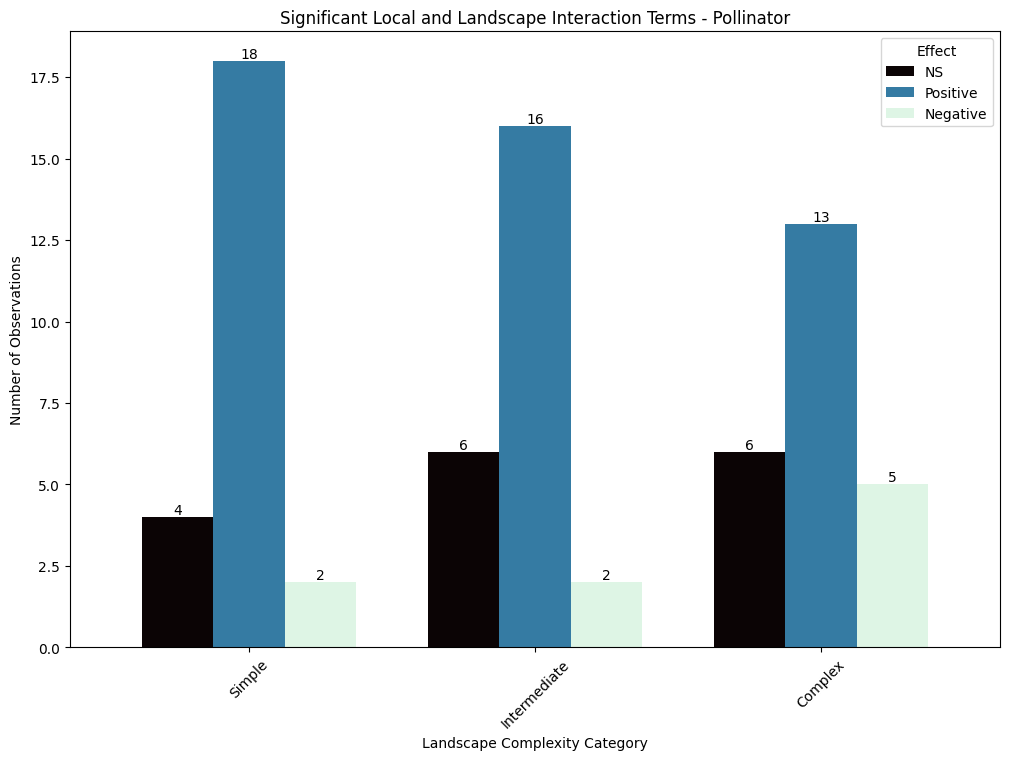

In [69]:
ax = (
    interaction_data.where(interaction_data["Response Category"] == "Pollinator")[
        ["Simple", "Intermediate", "Complex"]
    ]
    .apply(pd.Series.value_counts)
    .T[["NS", "Positive", "Negative"]]
    .plot(
        kind="bar",
        colormap="mako",
        width=0.75,
        title="Significant Local and Landscape Interaction Terms - Pollinator",
        ylabel="Number of Observations",
        xlabel="Landscape Complexity Category",
        rot=45,
        figsize=(12, 8),
    )
)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

ax.legend(title="Effect")


In [70]:
pollinator_interaction = (
    interaction_data.where(interaction_data["Response Category"] == "Pollinator")[
        ["Simple", "Intermediate", "Complex"]
    ]
    .apply(pd.Series.value_counts)
    .T[["NS", "Positive", "Negative"]]
    .T
)

pollinator_interaction


,Simple,Intermediate,Complex
NS,4,6,6
Positive,18,16,13
Negative,2,2,5


In [71]:
stats.chisquare(pollinator_interaction)


Power_divergenceResult(statistic=array([19.  , 13.  ,  4.75]), pvalue=array([7.48518299e-05, 1.50343919e-03, 9.30144892e-02]))

In [72]:
stats.chisquare(pollinator_interaction.T)


Power_divergenceResult(statistic=array([0.5       , 0.80851064, 2.        ]), pvalue=array([0.77880078, 0.66747368, 0.36787944]))

In [73]:
stats.chi2_contingency(pollinator_interaction)


Chi2ContingencyResult(statistic=3.3085106382978724, pvalue=0.5075849533928345, dof=4, expected_freq=array([[ 5.33333333,  5.33333333,  5.33333333],
       [15.66666667, 15.66666667, 15.66666667],
       [ 3.        ,  3.        ,  3.        ]]))

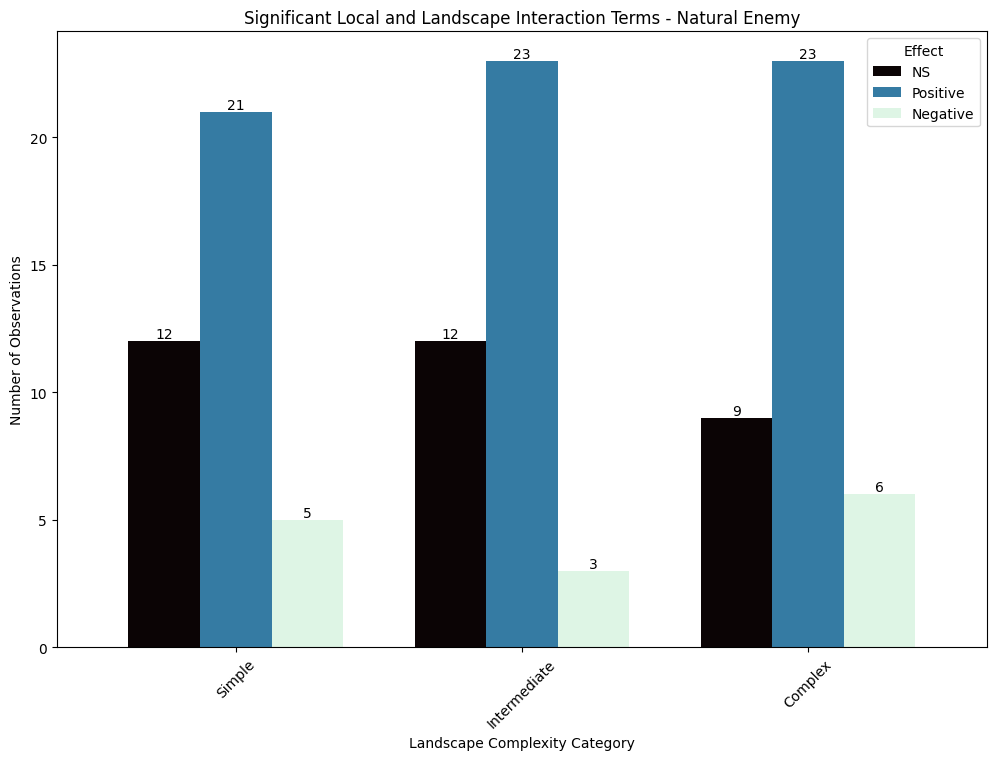

In [74]:
ax = (
    interaction_data.where(interaction_data["Response Category"] == "Natural enemy")[
        ["Simple", "Intermediate", "Complex"]
    ]
    .apply(pd.Series.value_counts)
    .T[["NS", "Positive", "Negative"]]
    .plot(
        kind="bar",
        colormap="mako",
        width=0.75,
        title="Significant Local and Landscape Interaction Terms - Natural Enemy",
        ylabel="Number of Observations",
        xlabel="Landscape Complexity Category",
        rot=45,
        figsize=(12, 8),
    )
)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

ax.legend(title="Effect")


In [75]:
natural_enemy_interaction = (
    interaction_data.where(interaction_data["Response Category"] == "Natural enemy")[
        ["Simple", "Intermediate", "Complex"]
    ]
    .apply(pd.Series.value_counts)
    .T[["NS", "Positive", "Negative"]]
    .T
)

natural_enemy_interaction


,Simple,Intermediate,Complex
NS,12,12,9
Positive,21,23,23
Negative,5,3,6


In [76]:
stats.chisquare(natural_enemy_interaction)


Power_divergenceResult(statistic=array([10.15789474, 15.84210526, 13.        ]), pvalue=array([0.00622646, 0.00036302, 0.00150344]))

In [77]:
stats.chisquare(natural_enemy_interaction.T)


Power_divergenceResult(statistic=array([0.54545455, 0.11940299, 1.        ]), pvalue=array([0.76130039, 0.9420457 , 0.60653066]))

In [78]:
stats.chi2_contingency(natural_enemy_interaction)


Chi2ContingencyResult(statistic=1.664857530529172, pvalue=0.7970909556182693, dof=4, expected_freq=array([[11.        , 11.        , 11.        ],
       [22.33333333, 22.33333333, 22.33333333],
       [ 4.66666667,  4.66666667,  4.66666667]]))

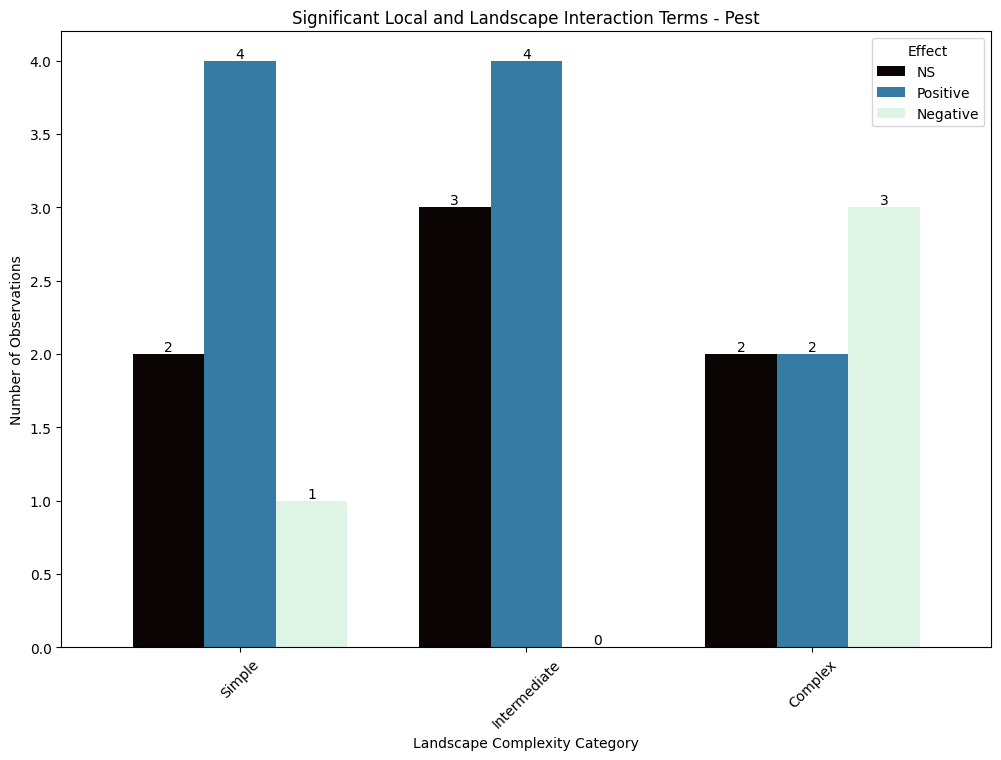

In [79]:
ax = (
    interaction_data.where(interaction_data["Response Category"] == "Pest")[
        ["Simple", "Intermediate", "Complex"]
    ]
    .apply(pd.Series.value_counts)
    .T[["NS", "Positive", "Negative"]]
    .plot(
        kind="bar",
        colormap="mako",
        width=0.75,
        title="Significant Local and Landscape Interaction Terms - Pest",
        ylabel="Number of Observations",
        xlabel="Landscape Complexity Category",
        rot=45,
        figsize=(12, 8),
    )
)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

ax.legend(title="Effect")


In [80]:
pest_interaction = (
    interaction_data.where(interaction_data["Response Category"] == "Pest")[
        ["Simple", "Intermediate", "Complex"]
    ]
    .apply(pd.Series.value_counts)
    .T[["NS", "Positive", "Negative"]]
    .T
).fillna(0)

pest_interaction


,Simple,Intermediate,Complex
NS,2.0,3.0,2.0
Positive,4.0,4.0,2.0
Negative,1.0,0.0,3.0


In [81]:
stats.chisquare(pest_interaction)

Power_divergenceResult(statistic=array([2.        , 3.71428571, 0.28571429]), pvalue=array([0.36787944, 0.15611805, 0.8668779 ]))

In [82]:
stats.chisquare(pest_interaction.T)

Power_divergenceResult(statistic=array([0.28571429, 0.8       , 3.5       ]), pvalue=array([0.8668779 , 0.67032005, 0.17377394]))

In [83]:
stats.chi2_contingency(pest_interaction)

Chi2ContingencyResult(statistic=4.585714285714285, pvalue=0.3325046205905675, dof=4, expected_freq=array([[2.33333333, 2.33333333, 2.33333333],
       [3.33333333, 3.33333333, 3.33333333],
       [1.33333333, 1.33333333, 1.33333333]]))

In [84]:
intensity_interactions = interaction_data.where(
    interaction_data["Local Strategy"] == "Intensity"
)[["Simple", "Intermediate", "Complex"]].apply(pd.Series.value_counts)

intensity_interactions


,Simple,Intermediate,Complex
Positive,27,21,20
NS,5,13,9
Negative,4,2,7


In [85]:
stats.chisquare(intensity_interactions)


Power_divergenceResult(statistic=array([28.16666667, 15.16666667,  8.16666667]), pvalue=array([7.65043354e-07, 5.08862186e-04, 1.68512013e-02]))

In [86]:
stats.chisquare(intensity_interactions.T)


Power_divergenceResult(statistic=array([1.26470588, 3.55555556, 2.92307692]), pvalue=array([0.53134012, 0.16901332, 0.23187926]))

In [87]:
stats.chi2_contingency(intensity_interactions)


Chi2ContingencyResult(statistic=7.74333836098542, pvalue=0.10144560306176552, dof=4, expected_freq=array([[22.66666667, 22.66666667, 22.66666667],
       [ 9.        ,  9.        ,  9.        ],
       [ 4.33333333,  4.33333333,  4.33333333]]))

In [88]:
structure_interactions = (
    interaction_data.where(interaction_data["Local Strategy"] == "Structure")[
        ["Simple", "Intermediate", "Complex"]
    ]
    .apply(pd.Series.value_counts)
    .fillna(0)
)

structure_interactions


,Simple,Intermediate,Complex
NS,0.0,1.0,0.0
Negative,1.0,0.0,0.0
Positive,3.0,3.0,4.0


In [89]:
stats.chisquare(structure_interactions)


Power_divergenceResult(statistic=array([3.5, 3.5, 8. ]), pvalue=array([0.17377394, 0.17377394, 0.01831564]))

In [90]:
stats.chisquare(structure_interactions.T)


Power_divergenceResult(statistic=array([2. , 2. , 0.2]), pvalue=array([0.36787944, 0.36787944, 0.90483742]))

In [91]:
stats.chi2_contingency(structure_interactions)


Chi2ContingencyResult(statistic=4.2, pvalue=0.37961492758424376, dof=4, expected_freq=array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [3.33333333, 3.33333333, 3.33333333]]))

In [92]:
floral_interactions = interaction_data.where(
    interaction_data["Local Strategy"] == "Floral"
)[["Simple", "Intermediate", "Complex"]].apply(pd.Series.value_counts)

floral_interactions


,Simple,Intermediate,Complex
NS,12,9,9
Negative,6,2,7
Positive,12,19,14


In [93]:
stats.chisquare(floral_interactions)


Power_divergenceResult(statistic=array([ 2.4, 14.6,  2.6]), pvalue=array([0.30119421, 0.00067554, 0.27253179]))

In [94]:
stats.chisquare(floral_interactions.T)


Power_divergenceResult(statistic=array([0.6       , 2.8       , 1.73333333]), pvalue=array([0.74081822, 0.24659696, 0.42035038]))

In [95]:
stats.chi2_contingency(floral_interactions)


Chi2ContingencyResult(statistic=5.133333333333333, pvalue=0.27388821949831943, dof=4, expected_freq=array([[10., 10., 10.],
       [ 5.,  5.,  5.],
       [15., 15., 15.]]))

In [96]:
diversity_interactions = interaction_data.where(
    interaction_data["Local Strategy"] == "Diversity"
)[["Simple", "Intermediate", "Complex"]].apply(pd.Series.value_counts)

diversity_interactions


,Simple,Intermediate,Complex
NS,5,5,1
Negative,3,2,3
Positive,5,6,9


In [97]:
stats.chisquare(diversity_interactions)


Power_divergenceResult(statistic=array([0.61538462, 2.        , 8.        ]), pvalue=array([0.73514148, 0.36787944, 0.01831564]))

In [98]:
stats.chisquare(diversity_interactions.T)


Power_divergenceResult(statistic=array([2.90909091, 0.25      , 1.3       ]), pvalue=array([0.23350648, 0.8824969 , 0.52204578]))

In [99]:
stats.chi2_contingency(diversity_interactions)


Chi2ContingencyResult(statistic=4.459090909090909, pvalue=0.3474258377291349, dof=4, expected_freq=array([[3.66666667, 3.66666667, 3.66666667],
       [2.66666667, 2.66666667, 2.66666667],
       [6.66666667, 6.66666667, 6.66666667]]))